$\space$

# ***Projet Analyse de Données - Prédiction de match de ligue 1 - Robin SIODLAK - Nicolas BIGEARD - ESILV A3***

$\space$

## Introduction

Le football, considéré comme le sport le plus populaire au monde, suscite un intérêt passionné non seulement parmi ses spectateurs mais aussi parmi les analystes et les parieurs sportifs. Le marché des paris sportifs, en particulier pour le football, constitue un secteur financier alternatif en pleine croissance, représentant un volume de 63 milliards USD uniquement pour les paris en ligne. Ce chiffre met en lumière l'importance croissante de développer des modèles prédictifs sophistiqués, non seulement pour anticiper les résultats des matchs mais aussi pour affiner les stratégies de tarification des paris.

L'objectif principal de ce projet est de développer un modèle prédictif capable de déterminer l'issue d'un match de football : une victoire de l'équipe extérieure, un match nul, ou une victoire de l'équipe locale. Si ce modèle vise à atteindre une précision respectable, il est important de souligner qu'il s'agit d'une ébauche initiale, destinée à illustrer les principes de base de l'analyse de données et de la modélisation.

Pour ce faire, nous allons procéder en quatres étapes :

$\textrm{I \space \textbf{Analyse de données}}$

$\textrm{II \space \textbf{Développement et analyse des performances du modèle}}$

$\textrm{III \space \textbf{Prédiction}}$

En abordant ce projet, nous espérons non seulement fournir un aperçu concret des défis et des possibilités associés à la prédiction des résultats sportifs, mais aussi de développer une méthodologie applicable à d'autre domaines.

$\space$

## $\textrm{I \space \textbf{Analyse des données}}$

On commence par importer les modules classiques de l'analyse de données.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### $\textrm{I.1 \space \textbf{Chargement des données}}$

Après avoir pris rapidement connaissance avec les données sur Excel, on les importe dans des dataframes Pandas.

In [91]:
matches = pd.read_csv('matchs_2013_2022.csv')
clubs = pd.read_csv('clubs_fr.csv')
players_data = pd.read_csv('player_appearance.csv')
valuations = pd.read_csv('player_valuation_before_season.csv')
lineups = pd.read_csv('game_lineups.csv', low_memory = False)
events = pd.read_csv('game_events.csv')

Vérification de l'importation des données, on commence aussi à se demander comment les mettres en relation entre elles.

In [92]:
clubs.head()

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name
0,969,montpellier-hsc,Montpellier Hérault Sport Club,FR1,25,25.7,12,48.0,8,Stade de la Mosson,32939,+€28.60m,NaN
1,1082,losc-lille,Lille Olympique Sporting Club Lille Métropole,FR1,25,25.4,18,72.0,7,Decathlon Arena-Stade Pierre-Mauroy,50186,+€3.65m,NaN
2,1160,nimes-olympique,Nîmes Olympique,FR1,26,25.4,12,46.2,3,Stade des Antonins,8033,+€2.50m,NaN
3,3911,stade-brest-29,Stade brestois 29,FR1,24,26.0,6,25.0,3,Stade Francis-Le Blé,15220,+€5.10m,NaN
4,595,sc-bastia,SC Bastia,FR1,25,27.6,8,32.0,6,Stade Armand-Cesari,16480,+€480k,NaN


In [93]:
matches.head()

,Unnamed: 0,game_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type,results
0,12,2330874,2013,8. Matchday,2013-09-28,618,595,2,2,6.0,...,Stade Geoffroy-Guichard,31952.0,Antony Gautier,4-3-3 Attacking,4-2-3-1,AS Saint-Étienne,SC Bastia,2:2,domestic_league,0
1,13,2330880,2013,10. Matchday,2013-10-19,14171,855,1,2,16.0,...,Parc des Sports d’Annecy,8620.0,Philippe Kalt,4-4-2 double 6,4-4-2 double 6,Thonon Évian Grand Genève FC,EA Guingamp,1:2,domestic_league,-1
2,14,2330916,2013,15. Matchday,2013-11-30,1423,1082,0,1,18.0,...,Stade du Hainaut,14874.0,Bartolomeu Varela,4-4-2 double 6,4-3-1-2,Valenciennes FC,Lille Olympique Sporting Club Lille Métropole,0:1,domestic_league,-1
3,15,2331018,2013,21. Matchday,2014-01-18,273,14171,0,0,15.0,...,Roazhon Park,13391.0,Benoît Millot,4-3-3 Attacking,4-2-3-1,Stade Rennais Football Club,Thonon Évian Grand Genève FC,0:0,domestic_league,0
4,16,2331034,2013,24. Matchday,2014-02-08,1147,273,3,1,20.0,...,Stade François-Coty,5981.0,Benoît Bastien,4-1-4-1,4-3-3 Defending,AC Ajaccio,Stade Rennais Football Club,3:1,domestic_league,1


In [94]:
players_data.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [95]:
print(matches.columns,"\n\n",
players_data.columns,"\n\n",
valuations.columns,"\n\n",
lineups.columns,"\n\n",
events.columns,"\n\n",
clubs.columns)

Index(['Unnamed: 0', 'game_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'results'],
      dtype='object') 

 Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object') 

 Index(['player_id', 'date', 'market_value_in_eur', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object') 

 Index(['Unnamed: 0', 'game_lineups_id', 'date', 'game_id', 'player_id',
       'club_id', 'player_name', 'type', 'position', 'number', 'team_captain'],
      dtype='objec

Les données sont bien chargées.

### $\textrm{I.2 \space \textbf{Pré - traitement des données}}$

On s'assure que les données sont homogènes, qu'il n'existe pas de NaN, ...

Commençons par mettre les dataframes dans une liste pour pouvoir les traiter ensemble.

In [96]:
Datasets = [matches, clubs, players_data, valuations, lineups]

On cherche les NaNs.

In [97]:
for df in Datasets:
    print(df.isnull().sum(), '\n\n')

Unnamed: 0                  0
game_id                     0
season                      0
round                       0
date                        0
home_club_id                0
away_club_id                0
home_club_goals             0
away_club_goals             0
home_club_position          0
away_club_position          0
home_club_manager_name      0
away_club_manager_name      0
stadium                     0
attendance                337
referee                     0
home_club_formation       382
away_club_formation       382
home_club_name              0
away_club_name              0
aggregate                   0
competition_type            0
results                     0
dtype: int64 


club_id                     0
club_code                   0
name                        0
domestic_competition_id     0
squad_size                  0
average_age                 0
foreigners_number           0
foreigners_percentage       0
national_team_players       0
stadium_name            

On remarque la présence de plusieurs valeurs erronées à travers les datasets :
- **attendance** : Public en nombre de personnes.
- **_club_formation** : "Stratégie" employée, type string "x-y-z".
- **coach_name** : Noms des entraîneurs, qui n'ont tout simplement pas été renseignés, type string.

Dans le meilleur des mondes, on tenterait de compléter ces informations avec d'autres sources mais on va se contenter de négliger ces données pour le moment. Justification empirique :

- **Public** : Cette variable ne semble de toutes les manières pas primordiale, on considérera si une équipe joue à domicile ou non dans notre étude.
- **Formation** : Cette variable peut être très intéressante et on pourrait l'inclure en la "numérisant" dans le modèle. Gros problème : on ne connaît pas les formations à l'avance ! Peut-être développer un autre modèle pour la prédire... (non)
- **Entraîneur** : On peut facilement trouver qui entraîne chaque équipe pendant la saison 2023, il faudrait cependant rendre cette variable significative, par exemple lui attribuer une variable indiquant le succès de cet entraîneur, un élo ?"

On procède à la suppression :

In [98]:
matches = matches.drop(columns = ["Unnamed: 0", "attendance", "home_club_formation", "away_club_formation"])
clubs = clubs.drop(columns = ["coach_name"]) # Que l'on peut garder pour une potentielle prédiction : les noms de coach sont dans le fichier à prédire.

rq : "Unnamed: 0" ne correspond à rien, on la supprime sans scrupule.

### $\textrm{I.3 \space \textbf{Agrégation des données}}$

Nous arrivons à une partie déterminante pour tout le travail qui va suivre. Nous disposons d'un ensemble de données historiques qui contiennent certaines informations. Le but est d'en extraire la plus grande quantité possible. Pour ce faire, on va établir empiriquement de nouvelles relations plus ou moins cohérentes à la prédiction entre ces données.

En d'autres termes, à partir des données fournies, on veut créer des métriques permettant de mesurer la performance d'une équipe.

À notre échelle, on peut se permettre de chercher à avoir le plus de statistiques possibles. On pourra alors quantifier leur impact sur la prédiction plus tard.

**Commençons par des métriques "simples" :**

Statistiques sous-jaçente : Résultat à l'extérieur (away) vs à domicile (home) ainsi que les statistiques dérivées de ces résultats (décrit en annotation)

In [99]:
matches['home_win'] = (matches['results'] == 1).astype(int)
matches['home_loss'] = (matches['results'] == -1).astype(int)
matches['home_draw'] = (matches['results'] == 0).astype(int)
matches['away_win'] = (matches['results'] == -1).astype(int)
matches['away_loss'] = (matches['results'] == 1).astype(int)
matches['away_draw'] = (matches['results'] == 0).astype(int)

Statistiques dérivées :

In [100]:
# Cas home.
# On agrège les données.
home_stats = matches.groupby('home_club_id').agg({
    'home_win': 'sum',
    'home_draw': 'sum',
    'home_loss': 'sum',
    'home_club_goals': ['sum', 'mean'],
    'away_club_goals': ['sum', 'mean']
}).reset_index()

# Les opérations précédents on modifié l'indéxation. On repasse d'un multiindex à un index simple :

home_stats.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in home_stats.columns]
home_stats.columns = [
    'club_id',                       # Renommé pour la cohérence
    'home_wins',                     # Nombre total de victoires à domicile
    'home_draws',                    # Nombre total de matchs nuls à domicile
    'home_losses',                   # Nombre total de défaites à domicile
    'home_goals_scored_sum',         # Total des buts marqués à domicile
    'home_goals_scored_avg',         # Moyenne des buts marqués à domicile par match
    'home_goals_conceded_sum',       # Total des buts concédés à domicile
    'home_goals_conceded_avg'        # Moyenne des buts concédés à domicile par match
]
home_stats.columns

Index(['club_id', 'home_wins', 'home_draws', 'home_losses',
       'home_goals_scored_sum', 'home_goals_scored_avg',
       'home_goals_conceded_sum', 'home_goals_conceded_avg'],
      dtype='object')

In [101]:
# Cas away.
away_stats = matches.groupby('away_club_id').agg({
    'away_win': 'sum',
    'away_draw': 'sum',
    'away_loss': 'sum',
    'away_club_goals': ['sum', 'mean'],
    'home_club_goals': ['sum', 'mean']
}).reset_index()

away_stats.columns = ['_'.join(col).strip() if type(col) is tuple else col for col in away_stats.columns]
away_stats.columns = [
    'club_id',                       # Renommé pour la cohérence
    'away_wins',                     # Nombre total de victoires à l'extérieur
    'away_draws',                    # Nombre total de matchs nuls à l'extérieur
    'away_losses',                   # Nombre total de défaites à l'extérieur
    'away_goals_scored_sum',         # Total des buts marqués à l'extérieur
    'away_goals_scored_avg',         # Moyenne des buts marqués à l'extérieur par match
    'away_goals_conceded_sum',       # Total des buts concédés à l'extérieur
    'away_goals_conceded_avg'        # Moyenne des buts concédés à l'extérieur par match
]
away_stats.head()

,club_id,away_wins,away_draws,away_losses,away_goals_scored_sum,away_goals_scored_avg,away_goals_conceded_sum,away_goals_conceded_avg
0,40,47,61,78,208,1.118280,281,1.510753
1,162,89,46,50,295,1.594595,230,1.243243
2,244,89,57,58,290,1.421569,238,1.166667
3,273,65,58,81,252,1.235294,267,1.308824
4,290,3,4,12,17,0.894737,35,1.842105


On a construit les statistisques, on merge toutes ces informations dans un même tableau sur club_id, d'où l'importance de faire une indéxation claire.

In [102]:
club_stat = home_stats.merge(away_stats)
club_stat.head()

,club_id,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,away_wins,away_draws,away_losses,away_goals_scored_sum,away_goals_scored_avg,away_goals_conceded_sum,away_goals_conceded_avg
0,40,77,56,51,252,1.369565,211,1.146739,47,61,78,208,1.118280,281,1.510753
1,162,107,45,33,361,1.951351,194,1.048649,89,46,50,295,1.594595,230,1.243243
2,244,111,51,42,351,1.720588,216,1.058824,89,57,58,290,1.421569,238,1.166667
3,273,98,49,57,312,1.529412,214,1.049020,65,58,81,252,1.235294,267,1.308824
4,290,5,7,7,18,0.947368,28,1.473684,3,4,12,17,0.894737,35,1.842105


Toujours plus de stats.....

In [103]:
# Nombre total de matchs joués
club_stat.loc[:, 'total_games'] = club_stat['home_wins'] + club_stat['home_draws'] + club_stat['home_losses'] + club_stat['away_wins'] + club_stat['away_draws'] + club_stat['away_losses']

# Pourcentages de [...]
club_stat.loc[:, 'win_percentage'] = ((club_stat['home_wins'] + club_stat['away_wins']) / club_stat['total_games']) * 100
club_stat.loc[:, 'draw_percentage'] = ((club_stat['home_draws'] + club_stat['away_draws']) / club_stat['total_games']) * 100
club_stat.loc[:, 'loss_percentage'] = ((club_stat['home_losses'] + club_stat['away_losses']) / club_stat['total_games']) * 100
club_stat.loc[:, 'total_goals_scored_per_game'] = (club_stat['home_goals_scored_sum'] + club_stat['away_goals_scored_sum']) / club_stat['total_games']

# Moyennes de [...]
club_stat.loc[:, 'avg_goals_scored_per_game'] = (club_stat['home_goals_scored_sum'] + club_stat['away_goals_scored_sum']) / club_stat['total_games']
club_stat.loc[:, 'avg_goals_conceded_per_game'] = (club_stat['home_goals_conceded_sum'] + club_stat['away_goals_conceded_sum']) / club_stat['total_games']
club_stat.loc[:, 'avg_goals_scored_per_game_home'] = club_stat['home_goals_scored_sum'] / (club_stat['home_wins'] + club_stat['home_draws'] + club_stat['home_losses'])
club_stat.loc[:, 'avg_goals_scored_per_game_away'] = club_stat['away_goals_scored_sum'] / (club_stat['away_wins'] + club_stat['away_draws'] + club_stat['away_losses'])

# Différence de buts
club_stat.loc[:, 'goal_difference'] = (club_stat['home_goals_scored_sum'] + club_stat['away_goals_scored_sum']) - (club_stat['home_goals_conceded_sum'] + club_stat['away_goals_conceded_sum'])

# Ratio but marqué, but encaissé.
club_stat.loc[:, 'goal_efficiency'] = (club_stat['home_goals_scored_sum'] + club_stat['away_goals_scored_sum']) / (club_stat['home_goals_conceded_sum'] + club_stat['away_goals_conceded_sum'])

Ajoutons une métrique à chaque club qui est la market_value, basée sur la somme des valeurs marchandes des joueurs de l'équipe.

In [104]:
valuations.columns

Index(['player_id', 'date', 'market_value_in_eur', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')

In [105]:
# Calculer la somme de la valeur marchande des joueurs pour chaque équipe
player_mkt_val_sum = valuations.groupby('current_club_id')['market_value_in_eur'].sum()
# On ajoute la colonne correspondante.
club_stat.loc[:, 'player_market_value_sum'] = club_stat['club_id'].map(player_mkt_val_sum)

On en profite pour ajouter les noms des clubs ainsi que leur abbréviation pour plus de clarté et pour faire des tableaux.

In [106]:
# On créé la colonne des noms de club indéxée sur les club_id
club_names = clubs.set_index('club_id')['name'].to_dict()
club_stat.loc[:, 'name'] = club_stat['club_id'].map(club_names)

# Je veux mettre les noms de club en premier...
cols = list(club_stat.columns)
cols.remove('name')
cols = ['name'] + cols
club_stat = club_stat[cols]

#On ajoute des abbréviations pour mieux visualiser les graphs...
abbreviations = {
    969: 'MHSC',
    1082: 'LOSC',
    1160: 'NO',
    3911: 'SB29',
    595: 'SCB',
    1158: 'FCL',
    273: 'SRFC',
    995: 'FCN',
    2969: 'DFCO',
    40: 'FCGB',
    1147: 'ACA',
    1159: 'ASNL',
    1421: 'SDR',
    1423: 'VAFC',
    162: 'ASM',
    750: 'FCSM',
    1041: 'OL',
    1162: 'SMC',
    3558: 'GFCA',
    667: 'RCSA',
    14171: 'ETG',
    244: 'OM',
    583: 'PSG',
    855: 'EAG',
    618: 'ASSE',
    1095: 'ESTAC',
    1420: 'SCO',
    3524: 'CF63',
    738: 'HAC',
    1416: 'ASC',
    826: 'RCL',
    415: 'TFC',
    417: 'OGCN',
    290: 'AJA',
    347: 'FCM'
}

# Ajout de la colonne 'name_abrv' 
club_stat.loc[:, 'name_abrv'] = club_stat['club_id'].map(abbreviations)

In [107]:
club_stat.head()

,name,club_id,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,away_wins,...,loss_percentage,total_goals_scored_per_game,avg_goals_scored_per_game,avg_goals_conceded_per_game,avg_goals_scored_per_game_home,avg_goals_scored_per_game_away,goal_difference,goal_efficiency,player_market_value_sum,name_abrv
0,FC Girondins Bordeaux,40,77,56,51,252,1.369565,211,1.146739,47,...,34.864865,1.243243,1.243243,1.329730,1.369565,1.118280,-32,0.934959,2284750000,FCGB
1,Association sportive de Monaco Football Club,162,107,45,33,361,1.951351,194,1.048649,89,...,22.432432,1.772973,1.772973,1.145946,1.951351,1.594595,232,1.547170,6485825000,ASM
2,Olympique de Marseille,244,111,51,42,351,1.720588,216,1.058824,89,...,24.509804,1.571078,1.571078,1.112745,1.720588,1.421569,187,1.411894,7340950000,OM
3,Stade Rennais Football Club,273,98,49,57,312,1.529412,214,1.049020,65,...,33.823529,1.382353,1.382353,1.178922,1.529412,1.235294,83,1.172557,3933400000,SRFC
4,AJ Auxerre,290,5,7,7,18,0.947368,28,1.473684,3,...,50.000000,0.921053,0.921053,1.657895,0.947368,0.894737,-28,0.555556,444350000,AJA


Ca marche.

**Statistiques composée "complexes" :**

Dans cette partie, on va tenter de proposer des variables plus complexes, dans le sens où elles sont définies par des relations "complexes" entre les variables.

- **PPG** (Points Per Game): 
   
Victoire = 3 points, Nul = 1 point, perte = 0 point. Puis on fait la moyenne sur le nombre total de matchs.

In [108]:
# Points par match
club_stat.loc[:, 'points_per_game'] = ((club_stat['home_wins'] + club_stat['away_wins']) * 3 + (club_stat['home_draws'] + club_stat['away_draws'])) / club_stat['total_games']

In [109]:
club_stat.columns

Index(['name', 'club_id', 'home_wins', 'home_draws', 'home_losses',
       'home_goals_scored_sum', 'home_goals_scored_avg',
       'home_goals_conceded_sum', 'home_goals_conceded_avg', 'away_wins',
       'away_draws', 'away_losses', 'away_goals_scored_sum',
       'away_goals_scored_avg', 'away_goals_conceded_sum',
       'away_goals_conceded_avg', 'total_games', 'win_percentage',
       'draw_percentage', 'loss_percentage', 'total_goals_scored_per_game',
       'avg_goals_scored_per_game', 'avg_goals_conceded_per_game',
       'avg_goals_scored_per_game_home', 'avg_goals_scored_per_game_away',
       'goal_difference', 'goal_efficiency', 'player_market_value_sum',
       'name_abrv', 'points_per_game'],
      dtype='object')

- **ELO Rating**
   
Le classement ELO est un indicateur de la performance il a été introduit dans les années 1950 et est officiellement utilisé dans le monde des échecs. Contrairement aux statistiques précédentes, l'ELO est calculé à partir d'une valeur initiale et est mise à jour à chaque rencontre. Il permet donc de mieux se rendre compte de la "forme" d'un club à un instant t. Dans ce qui suit, on va évaluer le score de chaque équipe sur la période 2013-2023.

On commence par extraire les valeurs nous intéressant : (cette partie à été développée à part, d'où les notations différentes). Le nom des clubs ne semble pas être le même dans les différent fichier, on va donc changer ca.

In [110]:
dataset = pd.read_csv('matchs_2013_2022.csv')

data = dataset[['results', 'home_club_name', 'away_club_name', 'home_club_id', 'away_club_id','home_club_goals','away_club_goals','season']]

data.head()

,results,home_club_name,away_club_name,home_club_id,away_club_id,home_club_goals,away_club_goals,season
0,0,AS Saint-Étienne,SC Bastia,618,595,2,2,2013
1,-1,Thonon Évian Grand Genève FC,EA Guingamp,14171,855,1,2,2013
2,-1,Valenciennes FC,Lille Olympique Sporting Club Lille Métropole,1423,1082,0,1,2013
3,0,Stade Rennais Football Club,Thonon Évian Grand Genève FC,273,14171,0,0,2013
4,1,AC Ajaccio,Stade Rennais Football Club,1147,273,3,1,2013


Après de nombreux essais pour calculer l'Elo des clubs, nous avons constaté des erreurs fréquentes. Les Girondins de Bordeaux et l'AS Saint-Étienne apparaissaient souvent parmi les dix meilleurs clubs.

Initialement, nous avons inclus les buts marqués dans le calcul de l'Elo, mais cela a engendré des scores extrêmes, comme un Elo de plus de 13000 pour le PSG, et des scores négatifs pour les derniers clubs.

Nous avons alors ajusté les points d'Elo gagnés pour chaque but en fonction de la différence d'Elo entre les deux équipes. Ainsi, le PSG gagnait moins de points en battant Le Havre que Monaco, mais l'AS Saint-Étienne restait dans le top 10.

Finalement, en ajoutant un facteur temps qui considère seulement les performances des dernières saisons, nous avons obtenu des résultats plus cohérents avec les classements actuels de Ligue 1.

Tout d'abord, il faut calculer le score attendu d'une opposition entre une équipe A et une équipe B. On utilise la formule :

$$p(R_A, R_B) = \frac{1}{1 + 10^{\frac{-(R_A - R_B)}{400}}}$$

Avec : 

$R_A$ : le rating de l'équipe A avant la rencontre

$R_B$ : le rating de l'équipe B avant la rencontre

In [111]:
expected_score = lambda rating1, rating2: 1 / (1 + 10 ** ((rating2 - rating1) / 400))

On met alors à jour l'elo des deux équipes. Pour ce faire, on s'est inspiré de la formule :

$$R_n = R_{n - 1} + KG(W - W_e)$$

Avec : 

$R_n$ : le rating de l'équipe.

$K$ : un poids qui dans notre cas dépend est fixé à 20.

$G$ : un autre poids qui dans notre cas est la variable multiplier définie telle que :

$$\text{multiplier} = \text{log}(∣\text{​goal}\_\text{diff}∣​+1) \times \frac{2.2}{∣R_A​−R_B​∣ \times 0.001 + 2.2} $$

Le terme $\text{log}(∣\text{​goal}\_\text{diff}∣​+1)$ permet de réduire l'impact de la différence de but.

Le terme $\frac{2.2}{∣R_A​−R_B​∣ \times 0.001 + 2.2}$ permet de réduire l'impact d'un match entre deux équipes avec une grande différence d'ELO.



In [112]:
def update_ratings(rating1, rating2, result, goal_diff, k = 20):
    expected1 = expected_score(rating1, rating2)
    diff_ELO = abs(rating1 - rating2)
    multiplier = np.log(abs(goal_diff) + 1) * (2.2 / (diff_ELO * 0.001 + 2.2))
    k_adjusted = k * multiplier
    rating1 += k_adjusted * (result - expected1)
    rating2 += k_adjusted * (1 - result - expected1)
    return rating1, rating2

On effectue alors le calcul de l'élo sur la période 2013 - 2022 :

In [113]:
def calculate_elo(data, years):
    current_year = data['season'].max()
    year_limit = current_year - years

    # On filtre par rapport au nombre d'années demandées.
    filtered_data = data[data['season'] > year_limit]

    # On initialise toutes les équipes avec un ELO de 1500
    all_teams = pd.concat([data['home_club_name'], data['away_club_name']]).unique()
    teams = {team: 1500 for team in all_teams}
    team_ids = {row['home_club_name']: row['home_club_id'] for index, row in data.iterrows()}
    team_ids.update({row['away_club_name']: row['away_club_id'] for index, row in data.iterrows()})

    # Mise à jour des ELO
    for index, row in filtered_data.iterrows():
        home_team, away_team = row['home_club_name'], row['away_club_name']
        result = row['results']
        goal_diff = row['home_club_goals'] - row['away_club_goals']
        home_rating, away_rating = teams[home_team], teams[away_team]
        
        new_home_rating, new_away_rating = update_ratings(home_rating, away_rating, result, goal_diff)
        teams[home_team] = new_home_rating
        teams[away_team] = new_away_rating

    # Préparation de la liste finale avec changement d'index en prévision du merge.
    final_list = [(name, team_ids[name], teams[name]) for name in teams]
    final_list.sort(key=lambda x: x[2], reverse=True)  # sort by elo_rating
    return final_list

elo_df = pd.DataFrame(calculate_elo(data, 3), columns=['name', 'club_id', 'elo_rating'])
elo_df = elo_df.drop(columns = ['name'])
elo_df.head()

,club_id,elo_rating
0,583,2635.316885
1,1082,2114.799865
2,1041,2009.838950
3,162,2000.051172
4,244,1965.679394


On merge

In [114]:
club_stat = club_stat.merge(elo_df, on = 'club_id', how = 'left')

In [115]:
club_stat.head()

,name,club_id,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,away_wins,...,avg_goals_scored_per_game,avg_goals_conceded_per_game,avg_goals_scored_per_game_home,avg_goals_scored_per_game_away,goal_difference,goal_efficiency,player_market_value_sum,name_abrv,points_per_game,elo_rating
0,FC Girondins Bordeaux,40,77,56,51,252,1.369565,211,1.146739,47,...,1.243243,1.329730,1.369565,1.118280,-32,0.934959,2284750000,FCGB,1.321622,1154.012424
1,Association sportive de Monaco Football Club,162,107,45,33,361,1.951351,194,1.048649,89,...,1.772973,1.145946,1.951351,1.594595,232,1.547170,6485825000,ASM,1.835135,2000.051172
2,Olympique de Marseille,244,111,51,42,351,1.720588,216,1.058824,89,...,1.571078,1.112745,1.720588,1.421569,187,1.411894,7340950000,OM,1.735294,1965.679394
3,Stade Rennais Football Club,273,98,49,57,312,1.529412,214,1.049020,65,...,1.382353,1.178922,1.529412,1.235294,83,1.172557,3933400000,SRFC,1.460784,1854.582507
4,AJ Auxerre,290,5,7,7,18,0.947368,28,1.473684,3,...,0.921053,1.657895,0.947368,0.894737,-28,0.555556,444350000,AJA,0.921053,1286.286196


$\space$

**Réarrangement du tableau club_stat :**

Le tableau club_stat sera celui où nous stockons toutes les statistiques de chaque clubs. Pour qu'il soit modulaire (permet de développer la prédiction sans avoir toutes les stats à disposition), on le réarrange pour avoir l'ordre (par bloc ?) suivant :
<div align = "center">
identifiants (club_id, name, name_abbrv)|Stats (dans n'importe quel ordre)
</div>                                                                                    


In [116]:
first_columns = ['club_id', 'name', 'name_abrv']
remaining_columns = [col for col in club_stat.columns if col not in first_columns]
club_stat = club_stat[first_columns + remaining_columns]

# On exporte le dataset pour mieux visualiser les données... 
# club_stat.to_csv(r'temp\club_statistics.csv', sep=';', index=False, encoding='utf-8-sig')
club_stat.head()

,club_id,name,name_abrv,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,...,total_goals_scored_per_game,avg_goals_scored_per_game,avg_goals_conceded_per_game,avg_goals_scored_per_game_home,avg_goals_scored_per_game_away,goal_difference,goal_efficiency,player_market_value_sum,points_per_game,elo_rating
0,40,FC Girondins Bordeaux,FCGB,77,56,51,252,1.369565,211,1.146739,...,1.243243,1.243243,1.329730,1.369565,1.118280,-32,0.934959,2284750000,1.321622,1154.012424
1,162,Association sportive de Monaco Football Club,ASM,107,45,33,361,1.951351,194,1.048649,...,1.772973,1.772973,1.145946,1.951351,1.594595,232,1.547170,6485825000,1.835135,2000.051172
2,244,Olympique de Marseille,OM,111,51,42,351,1.720588,216,1.058824,...,1.571078,1.571078,1.112745,1.720588,1.421569,187,1.411894,7340950000,1.735294,1965.679394
3,273,Stade Rennais Football Club,SRFC,98,49,57,312,1.529412,214,1.049020,...,1.382353,1.382353,1.178922,1.529412,1.235294,83,1.172557,3933400000,1.460784,1854.582507
4,290,AJ Auxerre,AJA,5,7,7,18,0.947368,28,1.473684,...,0.921053,0.921053,1.657895,0.947368,0.894737,-28,0.555556,444350000,0.921053,1286.286196


On peut alors facilement récupérer les stats en faisant du slicing.

In [117]:
club_stat.head()

,club_id,name,name_abrv,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,...,total_goals_scored_per_game,avg_goals_scored_per_game,avg_goals_conceded_per_game,avg_goals_scored_per_game_home,avg_goals_scored_per_game_away,goal_difference,goal_efficiency,player_market_value_sum,points_per_game,elo_rating
0,40,FC Girondins Bordeaux,FCGB,77,56,51,252,1.369565,211,1.146739,...,1.243243,1.243243,1.329730,1.369565,1.118280,-32,0.934959,2284750000,1.321622,1154.012424
1,162,Association sportive de Monaco Football Club,ASM,107,45,33,361,1.951351,194,1.048649,...,1.772973,1.772973,1.145946,1.951351,1.594595,232,1.547170,6485825000,1.835135,2000.051172
2,244,Olympique de Marseille,OM,111,51,42,351,1.720588,216,1.058824,...,1.571078,1.571078,1.112745,1.720588,1.421569,187,1.411894,7340950000,1.735294,1965.679394
3,273,Stade Rennais Football Club,SRFC,98,49,57,312,1.529412,214,1.049020,...,1.382353,1.382353,1.178922,1.529412,1.235294,83,1.172557,3933400000,1.460784,1854.582507
4,290,AJ Auxerre,AJA,5,7,7,18,0.947368,28,1.473684,...,0.921053,0.921053,1.657895,0.947368,0.894737,-28,0.555556,444350000,0.921053,1286.286196


### $\textrm{I.4 \space \textbf{Des graphes !}}$

Dans cette partie, on propose des graphs dans le but de développer une intuition quant au lien qu'il pourrait exister entre les statistiques.

1. Graphique en barres des victoires, des matchs nuls et des défaites pour chaque club.

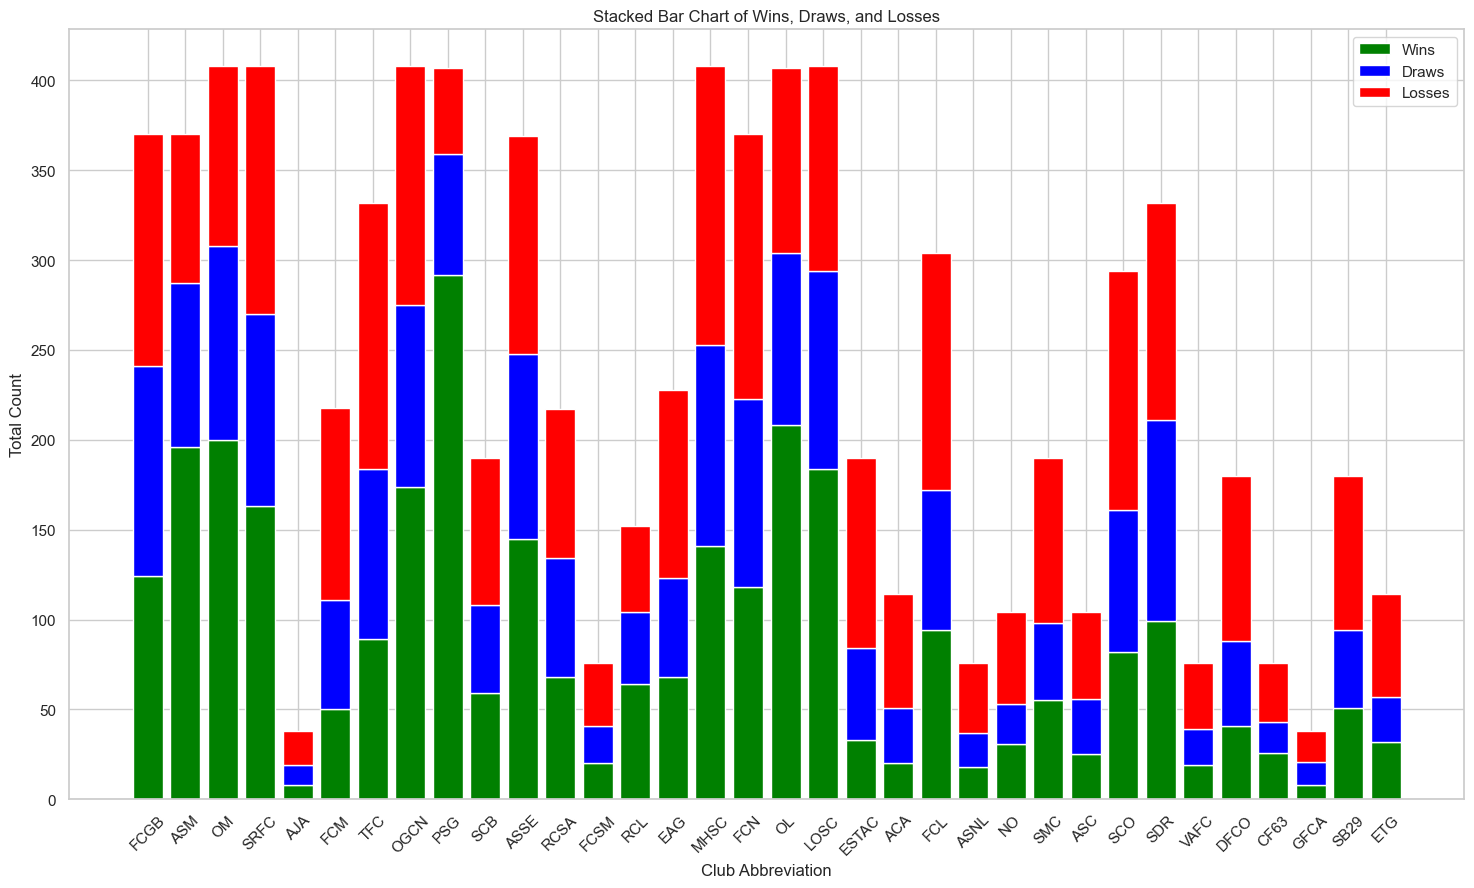

In [118]:
sns.set(style="whitegrid")

plt.figure(figsize = (18, 10))
total_wins = club_stat['home_wins'] + club_stat['away_wins']
total_draws = club_stat['home_draws'] + club_stat['away_draws']
total_losses = club_stat['home_losses'] + club_stat['away_losses']

indices = range(len(club_stat['name_abrv']))

plt.bar(club_stat['name_abrv'], total_wins, label = 'Wins', color = 'green')
plt.bar(club_stat['name_abrv'], total_draws, bottom = total_wins, label = 'Draws', color = 'blue')
plt.bar(club_stat['name_abrv'], total_losses, bottom = total_wins + total_draws, label = 'Losses', color = 'red')
plt.xlabel('Club Abbreviation')
plt.ylabel('Total Count')
plt.title('Stacked Bar Chart of Wins, Draws, and Losses')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Ce graphique nous permet de constater plusieurs choses :

-   Le nombre total de match joué est inégale en Ligue 1 : Les clubs habitués ont-ils plus de probabilité de gagner un match ?
-   La proportion victioire / défaite semble liée avec le nombre de match total : cohérent, il faut gagner pour rester en L1, plus on y reste plus on a de victoire par rapport au défaites.

$\space$

2.  Graphiques des buts marqués à domicile et à l'extérieur pour chaque club


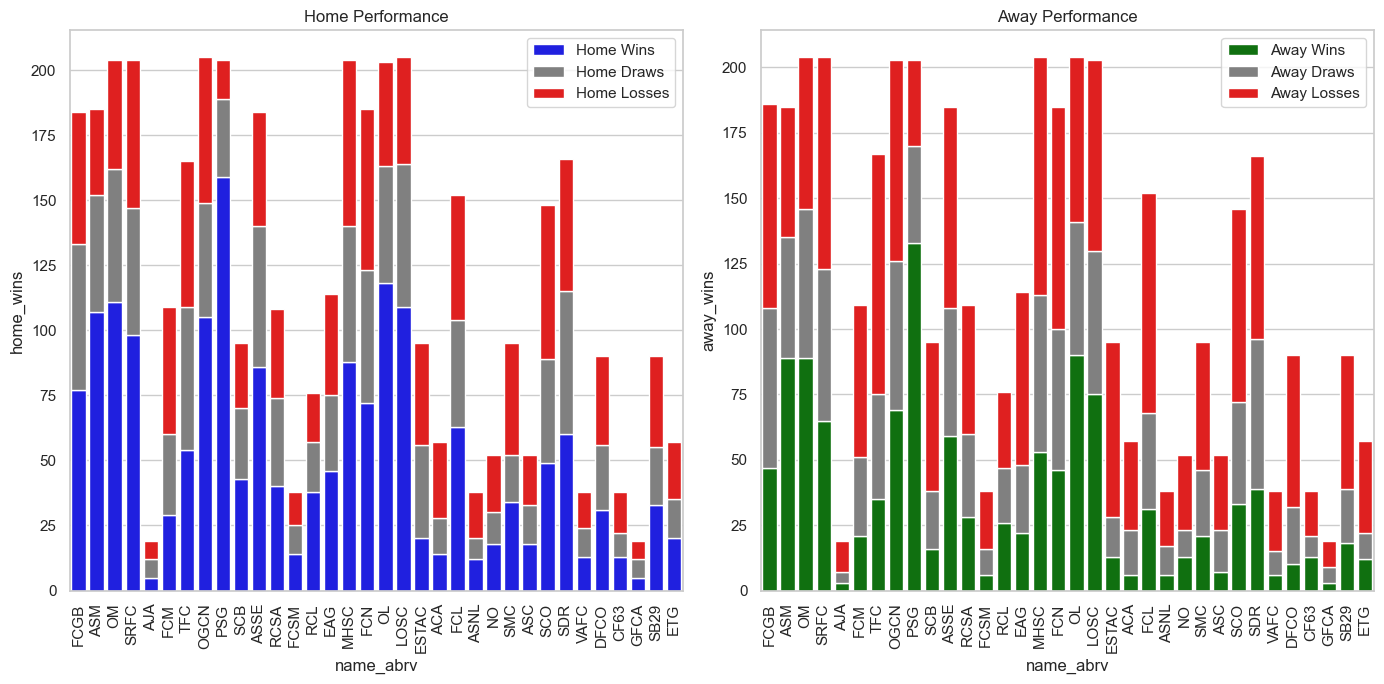

In [119]:
plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
sns.barplot(data = club_stat, x = 'name_abrv', y = 'home_wins', color = 'blue', label = 'Home Wins')
sns.barplot(data = club_stat, x = 'name_abrv', y = 'home_draws', bottom = club_stat['home_wins'], color = 'gray', label = 'Home Draws')
sns.barplot(data = club_stat, x = 'name_abrv', y = 'home_losses', bottom = club_stat['home_wins'] + club_stat['home_draws'], color = 'red', label = 'Home Losses')
plt.xticks(rotation = 90)
plt.title('Home Performance')
plt.legend()

plt.subplot(1, 2, 2)
sns.barplot(data = club_stat, x = 'name_abrv', y = 'away_wins', color = 'green', label = 'Away Wins')
sns.barplot(data = club_stat, x = 'name_abrv', y = 'away_draws', bottom = club_stat['away_wins'], color = 'gray', label = 'Away Draws')
sns.barplot(data = club_stat, x ='name_abrv', y = 'away_losses', bottom = club_stat['away_wins'] + club_stat['away_draws'], color = 'red', label = 'Away Losses')
plt.xticks(rotation = 90)
plt.title('Away Performance')
plt.legend()
plt.tight_layout()
plt.show()

Ces deux graphes permettent, entre autre, de supposer que le fait de jouer à domicile est un avantage pour ce qui semble être, la majorité des clubs.

$\space$

3.  Graphique des victoires en fonction de la valeur marchande des joueurs de club.

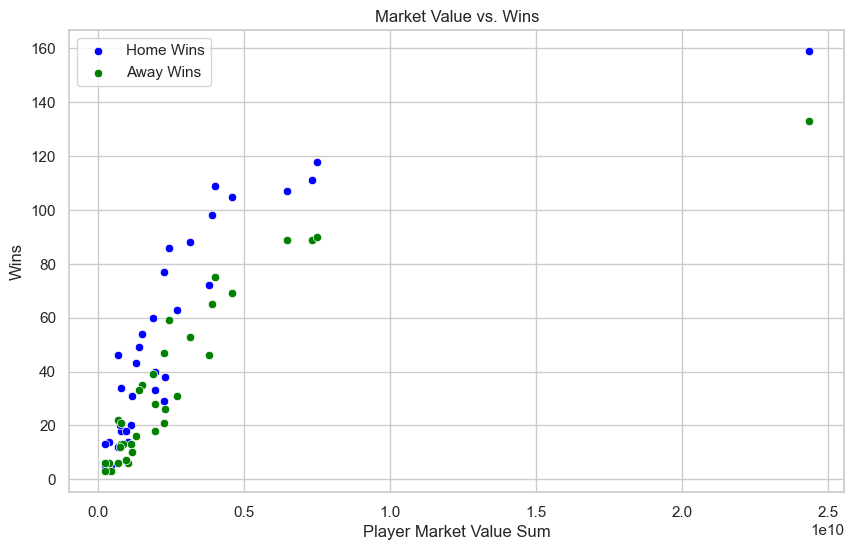

In [120]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = club_stat, x = 'player_market_value_sum', y = 'home_wins', color = 'blue', label = 'Home Wins')
sns.scatterplot(data = club_stat, x = 'player_market_value_sum', y = 'away_wins', color = 'green', label = 'Away Wins')
plt.title('Market Value vs. Wins')
plt.xlabel('Player Market Value Sum')
plt.ylabel('Wins')
plt.legend()
plt.show()

On voit ici que les données semblent en effet bien être liées par une relation du type $y = x^{\alpha}$ avec $\alpha \in ]0,1[$.

Passons à l'échelle logarithmique qui devrait linéariser ce genre de relation :

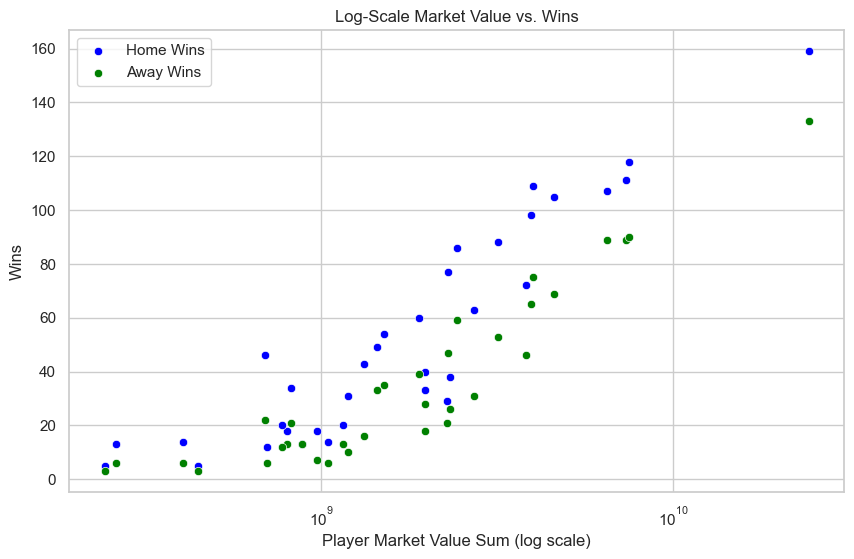

In [121]:
plt.figure(figsize = (10, 6))
ax = plt.gca()
sns.scatterplot(data = club_stat, x = 'player_market_value_sum', y = 'home_wins', color = 'blue', label = 'Home Wins')
sns.scatterplot(data = club_stat, x = 'player_market_value_sum', y = 'away_wins', color = 'green', label = 'Away Wins')
ax.set_xscale('log')
#ax.set_yscale('log')
plt.title('Log-Scale Market Value vs. Wins')
plt.xlabel('Player Market Value Sum (log scale)')
plt.ylabel('Wins')
plt.legend()
plt.show()

Il semble en effet avoir une relation linéaire entre la market value et le nombre de victoire, en particulier sur la plage $mrkt_{val} >10^9$

4.  Matrice de corrélation

Graphique ultime de la visualisation de données.

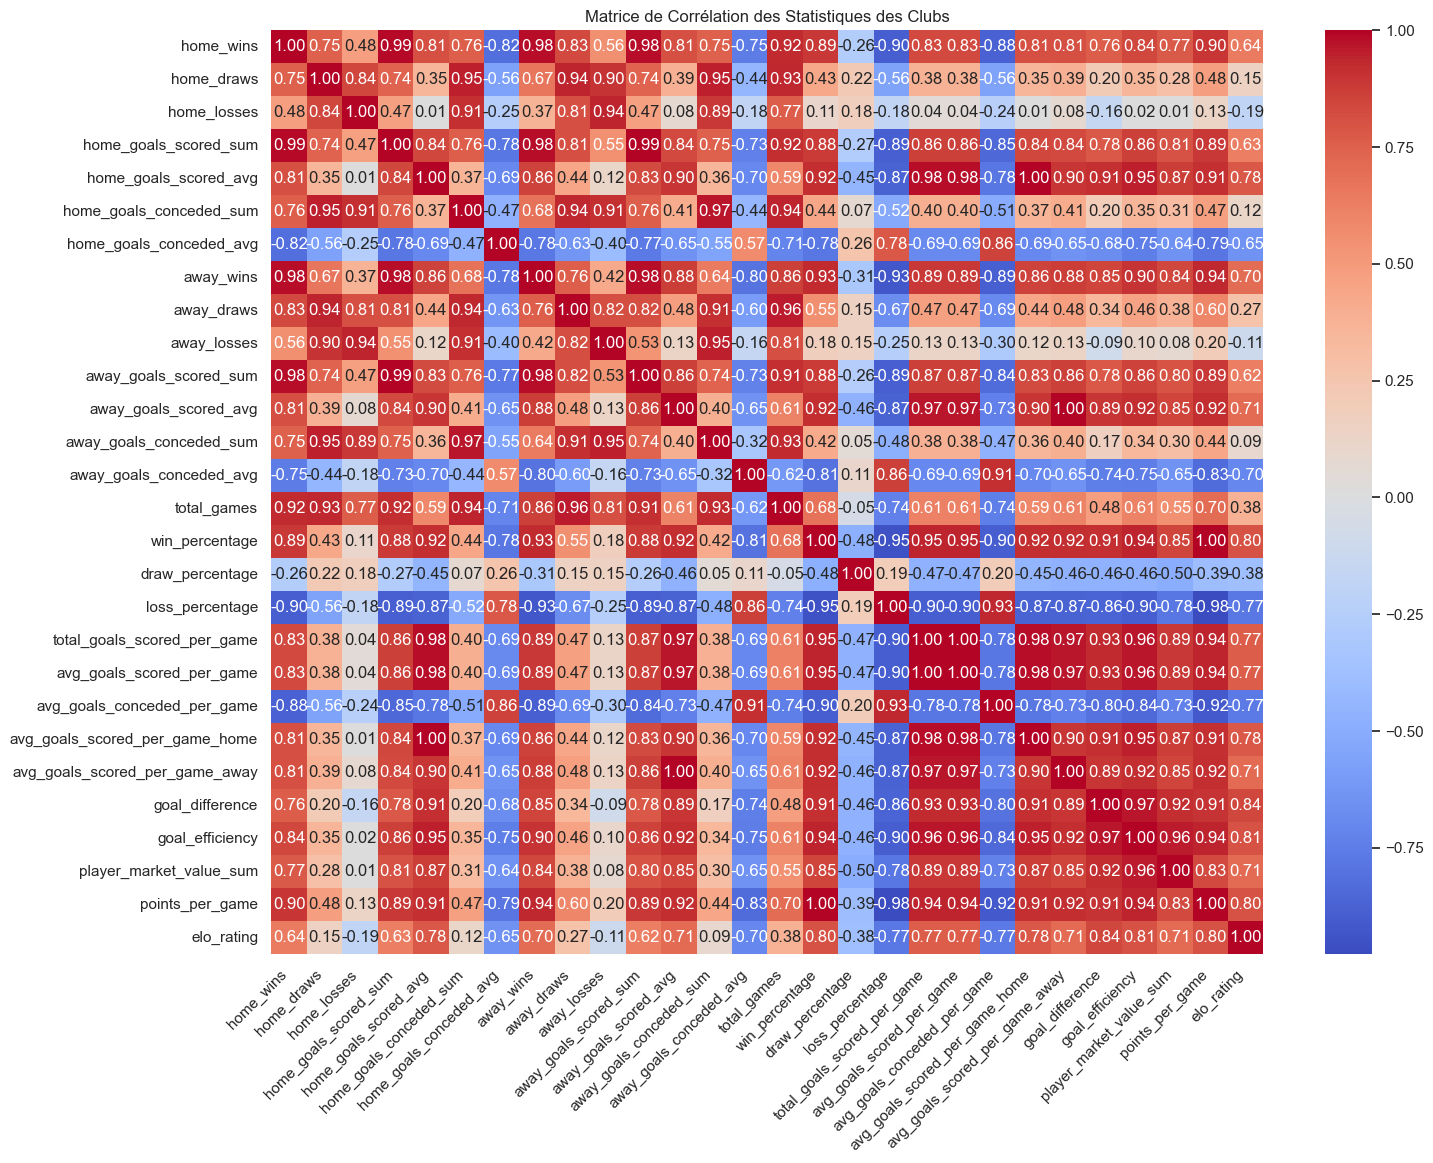

In [122]:
# On prend toutes les colonnes après la 3ème pour calculer la matrice de corrélation. (D'où l'importance de la modularité de club_stat)
cols = club_stat.columns[3:]

# Calcul de la matrice de corrélation
correlation_matrix = club_stat[cols].corr()

plt.figure(figsize = (16, 12))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('Matrice de Corrélation des Statistiques des Clubs')
plt.xticks(rotation = 45, ha = "right")
plt.yticks(rotation = 0)
plt.show()

Essayons de clusteriser les différentes mesures de corrélation pour rendre la matrice plus lisible :

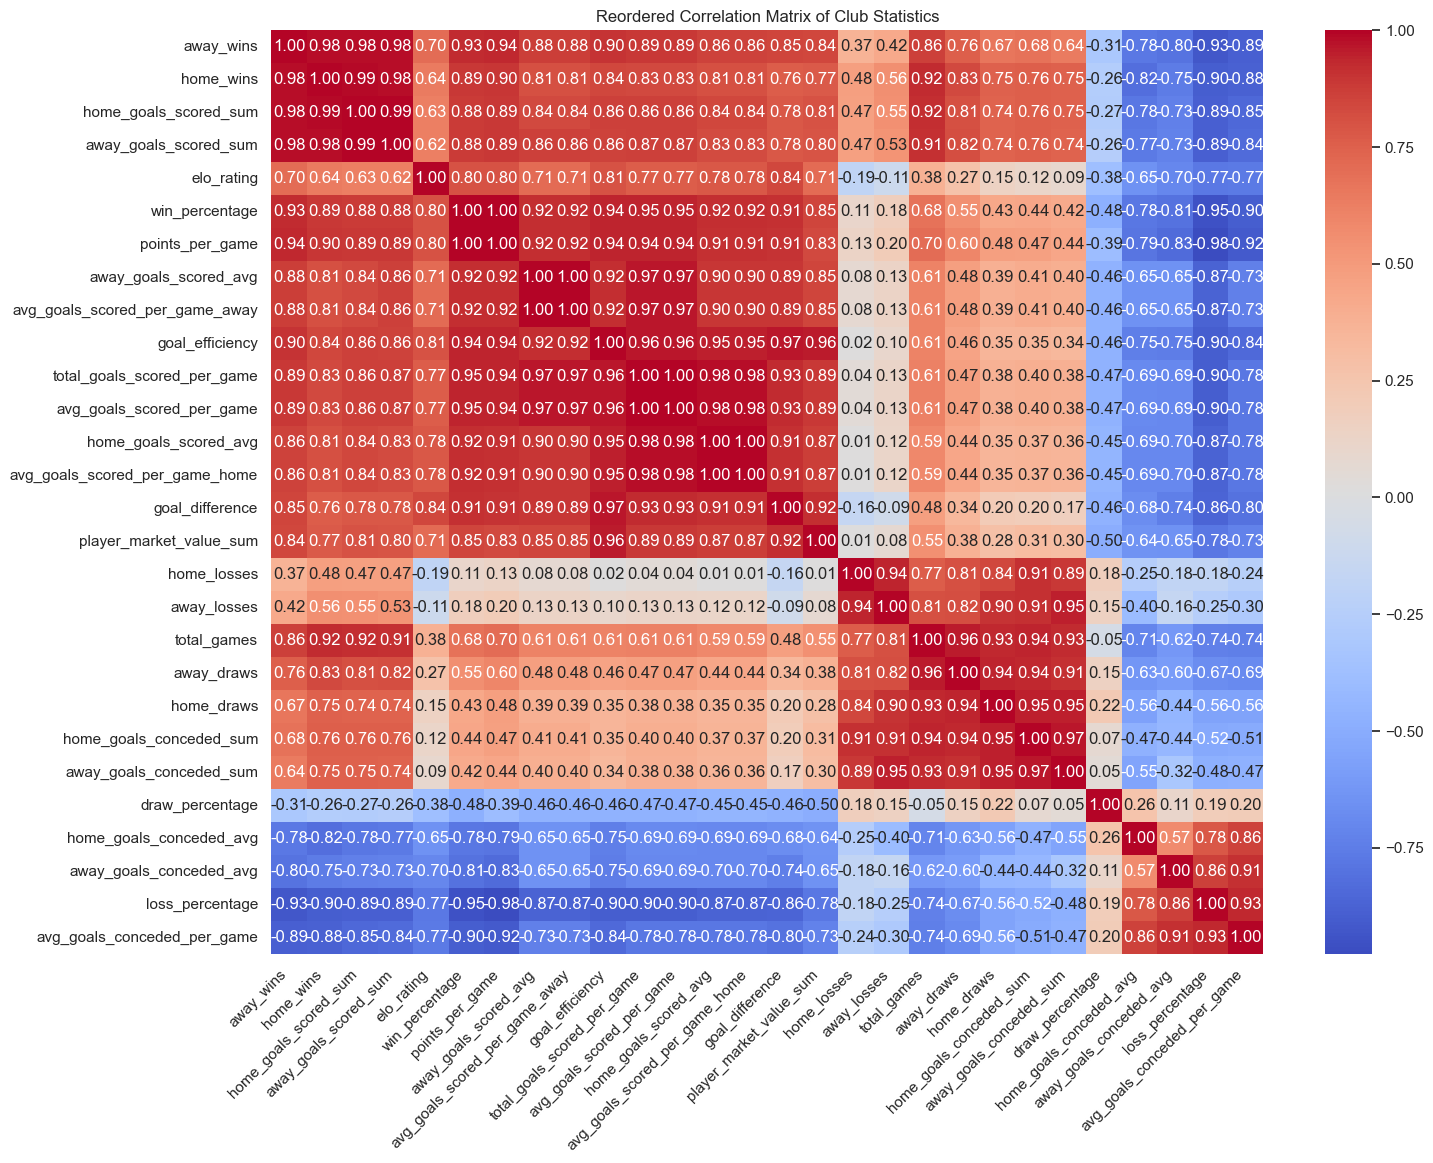

In [123]:
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list

correlation_matrix = club_stat[cols].corr()

corr_linkage = linkage(correlation_matrix, method='average')
dendro = dendrogram(corr_linkage, labels = cols, no_plot=True)
sorted_idx = dendro['leaves']

sorted_corr_matrix = correlation_matrix.iloc[sorted_idx, sorted_idx]

plt.figure(figsize=(16, 12))
sns.heatmap(sorted_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Reordered Correlation Matrix of Club Statistics')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

Encore une fois, de nombreuses conclusions peuvent êtres tirées de cette matrice. La plus important est que certaines métriques sont inutiles, ce qui est attendu au vu de comment certaines sont construites (constructions qui n'éxtraient pas plus d'information que la première ?). Pour la première fois dans ce projet, nous allons faire preuve de sobriété et allons réduire la dimensionnalité du problème dans la partie qui suit...

Rapide explication des méthodes utilisées

*linkage* : Effectue le regroupement hiérarchique/agglomératif.

*dendrogram* : Effectue le Dendrogram pour le clustering des données corrélées / anti-corrélées.

*sorted_idx* : Extrait l'ordre optimal des variables pour regrouper celles ayant des corrélations élevées ensemble.

5.  Graph de l'ELO rating


C:\Users\robin\AppData\Local\Temp\ipykernel_8880\1839649792.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'elo_rating', y = 'name', data = club_stat, palette = 'dark')


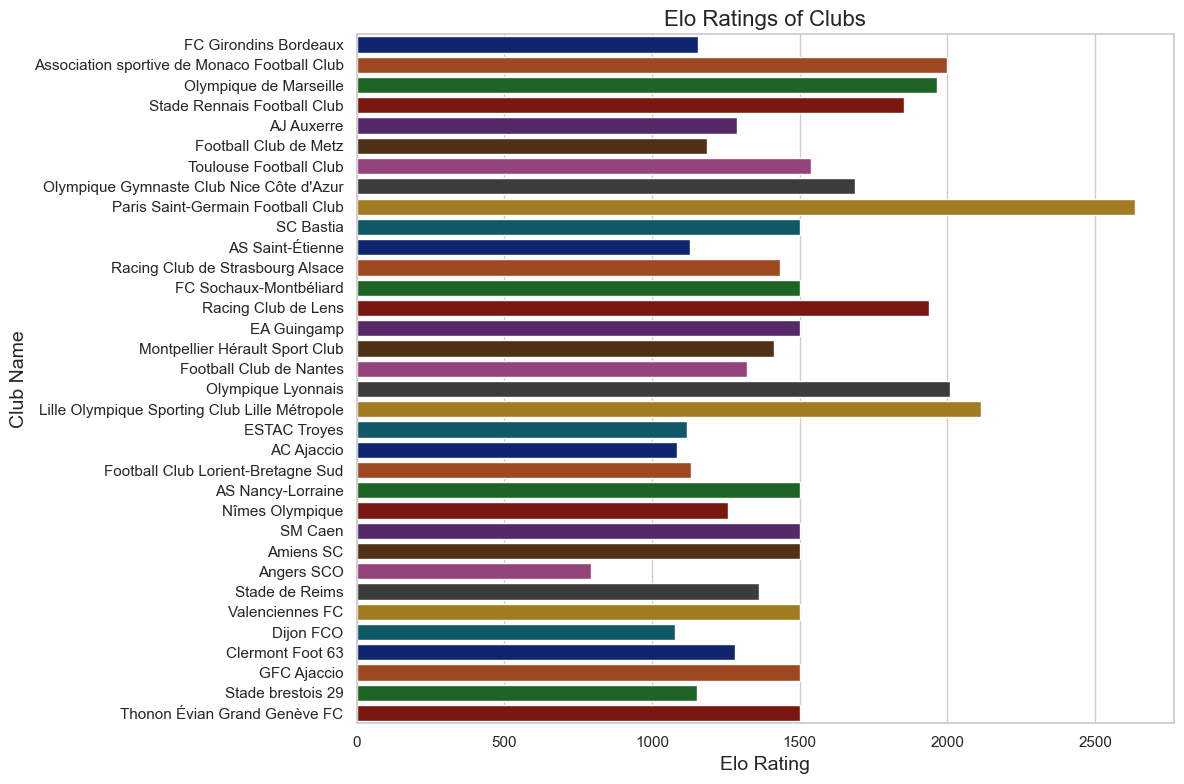

In [124]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'elo_rating', y = 'name', data = club_stat, palette = 'dark')
plt.title('Elo Ratings of Clubs', fontsize = 16)
plt.xlabel('Elo Rating', fontsize = 14)
plt.ylabel('Club Name', fontsize = 14)
plt.tight_layout()
plt.show()

$\space$

## $\textrm{II \space \textbf{Développement et analyse des performances du modèle}}$


### $\textrm{II.1 \space \textbf{Briefing théorique}}$

Popur appliquer les algorithmes complexes qui sont à suivrent, il faut se placer dans un cadre le plus théorique possible pour comprendre ce que l'on fait.

Le but de notre modèle est de prédire un résultat de match à partir d'un **match_id**. 

La variable **results** est dans {-1, 0, 1} qui correspond respectivement à victoire du club ext, nul, victoire club local. 

La variable **game_id** correspond a un match dans le dataframe *match_2023* à prédire. Dans ce dataframe, on retrouve **home_club_id** et **away_club_id** qui correspondent à deux **club_id** du dataframe *club_stats*.

Pour bien visualiser ce que l'on veut faire (ou pas), on peut passer par le diagramme "fonctionnel" suivant :

<div align = "center">

$game\_id  \mapsto results $

$game\_id \mapsto (home\_club\_id, away\_club\_id)  \mapsto results$

$game\_id \mapsto (home\_club\_id, away\_club\_id) \mapsto ((x_1,\dots,x_n), (x'_1,\dots,x'_n)) \mapsto results$
</div>

Avec $n$ la dimension de l'espace de PCA et les $x_i, x'_i$ les coordonnées des statistiques projetées dans cet espace.

Soit le schéma suivant :
<div align = "center">

\begin{array}{ccc}
\{4094596, \dots,4094777\} = match\_ pred (game\_id) & \rightarrow & \{40, \dots, 14171\}² = stat\_club(club\_id)² & \rightarrow & \mathbb{R}^n \times \mathbb{R}^n& \rightarrow & \{-1, 0, 1\}\\
game\_id & \mapsto & (home\_club\_id, away\_club\_id) & \mapsto & ((x_1,\dots,x_n), (x'_1,\dots,x'_n)) & \mapsto & results
\end{array}

</div>

On a donc identifié le vecteur caractérisitique $X = ((x_1,\dots,x_n), (x'_1,\dots,x'_n))$ et la colonne cible $y = results$

$\space$

### $\textrm{II.2 \space \textbf{Préparation des datasets de modélisation et prédiction}}$

Dans cette partie, on va agréger l'historique des matchs avec les résultats ainsi que les statistiques du club_home et club_away pour créer le dataset de modélisation. Soit le vecteur caractéristique $X$ et la colonne cible $y$.

On va aussi extraire les données nécessaires à la prédiction des résultats de 2023.

Agrégation des statistiques et des résultats. On drop toutes les autres colonnes.

In [125]:
matches_hist_res = pd.read_csv('matchs_2013_2022.csv')
matches_hist_res = matches_hist_res.drop(columns = ['Unnamed: 0', 'game_id', 'season', 'round', 'date', 'home_club_goals', 'away_club_goals','home_club_position', 'away_club_position', 'home_club_manager_name','away_club_manager_name', 'stadium', 'attendance', 'referee','home_club_formation', 'away_club_formation', 'home_club_name','away_club_name', 'aggregate', 'competition_type'])
matches_hist_res.columns

Index(['home_club_id', 'away_club_id', 'results'], dtype='object')

De même avec le dataset de prédiction...

In [126]:
match_pred = pd.read_csv('match_2023.csv')
#Seul les colonnes utiles pour la prédiction sont gardées, cela peut varier en fonctions des besoins.
match_pred.head()

,game_id,date,home_club_id,away_club_id,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,competition_type
0,4094596,2023-08-26,583,826,Luis Enrique,Franck Haise,Parc des Princes,47000.0,François Letexier,Paris Saint-Germain Football Club,Racing Club de Lens,domestic_league
1,4094622,2023-09-16,826,347,Franck Haise,László Bölöni,Stade Bollaert-Delelis,37988.0,Stéphanie Frappart,Racing Club de Lens,Football Club de Metz,domestic_league
2,4094630,2023-09-24,969,273,Michel Der Zakarian,Bruno Génésio,Stade de la Mosson,15430.0,Stéphanie Frappart,Montpellier Hérault Sport Club,Stade Rennais Football Club,domestic_league
3,4094647,2023-10-07,347,417,László Bölöni,Francesco Farioli,Stade Saint-Symphorien,23160.0,Jérôme Brisard,Football Club de Metz,Olympique Gymnaste Club Nice Côte d'Azur,domestic_league
4,4094696,2023-12-03,244,273,Gennaro Gattuso,Julien Stéphan,Orange Vélodrome,54162.0,Willy Delajod,Olympique de Marseille,Stade Rennais Football Club,domestic_league


In [127]:
match_pred = match_pred.drop(columns = ['date','home_club_manager_name', 'away_club_manager_name', 'stadium','attendance', 'referee', 'home_club_name', 'away_club_name','competition_type'])
match_pred.head()

,game_id,home_club_id,away_club_id
0,4094596,583,826
1,4094622,826,347
2,4094630,969,273
3,4094647,347,417
4,4094696,244,273


## /!\ **Avant de merge ces données avec les statistiques de l'équipe home et away, on normalise club_stat** /!\

In [128]:
from sklearn.preprocessing import StandardScaler

club_stat_norm = club_stat.copy()
Col_data =  club_stat.columns[3:]
scalar = StandardScaler()
club_stat_norm = club_stat.copy()
club_stat_norm[Col_data] = scalar.fit_transform(club_stat[Col_data])
club_stat_norm.head()

,club_id,name,name_abrv,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,...,total_goals_scored_per_game,avg_goals_scored_per_game,avg_goals_conceded_per_game,avg_goals_scored_per_game_home,avg_goals_scored_per_game_away,goal_difference,goal_efficiency,player_market_value_sum,points_per_game,elo_rating
0,40,FC Girondins Bordeaux,FCGB,0.610493,1.440329,0.949115,0.591526,0.004211,1.153315,-0.368855,...,0.113667,0.113667,-0.309007,0.004211,0.241533,-0.212574,0.019764,-0.140429,0.234407,-0.898026
1,162,Association sportive de Monaco Football Club,ASM,1.373610,0.792094,-0.144780,1.451548,1.710697,0.887731,-0.820862,...,1.843868,1.843868,-1.151918,1.710697,1.897001,1.541165,1.345588,0.861957,1.823926,1.410794
2,244,Olympique de Marseille,OM,1.475359,1.145677,0.402167,1.372647,1.033826,1.231428,-0.773976,...,1.184441,1.184441,-1.304191,1.033826,1.295636,1.242232,1.052631,1.065992,1.514881,1.316994
3,273,Stade Rennais Football Club,SRFC,1.144675,1.027816,1.313747,1.064933,0.473071,1.200183,-0.819153,...,0.568026,0.568026,-1.000678,0.473071,0.648226,0.551365,0.534314,0.252943,0.665169,1.013813
4,290,AJ Auxerre,AJA,-1.220987,-1.447262,-1.724851,-1.254760,-1.234169,-1.705619,1.137730,...,-0.938671,-0.938671,1.196097,-1.234169,-0.535405,-0.186003,-0.801886,-0.579553,-1.005506,-0.537054


On merge à gauche sur home_club et à droite sur club_id puis de même pour away.

In [129]:
# Fusion des statistiques pour l'équipe à domicile
matches_hist_res = matches_hist_res.merge(
    club_stat_norm,
    how='left',
    left_on='home_club_id',
    right_on='club_id',
    suffixes=('', '_home')
)

# Fusion des statistiques pour l'équipe à l'extérieur
matches_hist_res = matches_hist_res.merge(
    club_stat_norm,
    how='left',
    left_on='away_club_id',
    right_on='club_id',
    suffixes=('', '_away')
)

#matches_hist_res.to_csv(r'temp\matches_hist_res.csv', sep=';', index=False, encoding='utf-8-sig') # On exporte le dataset pour mieux visualiser les données...
matches_hist_res

,home_club_id,away_club_id,results,club_id,name,name_abrv,home_wins,home_draws,home_losses,home_goals_scored_sum,...,total_goals_scored_per_game_away,avg_goals_scored_per_game_away,avg_goals_conceded_per_game_away,avg_goals_scored_per_game_home_away,avg_goals_scored_per_game_away_away,goal_difference_away,goal_efficiency_away,player_market_value_sum_away,points_per_game_away,elo_rating_away
0,618,595,0,618,AS Saint-Étienne,ASSE,0.839428,1.322468,0.523711,0.796669,...,-0.612051,-0.612051,-0.034996,-0.369652,-0.864670,-0.465007,-0.413603,-0.369546,-0.174641,0.046166
1,14171,855,-1,14171,Thonon Évian Grand Genève FC,ETG,-0.839428,-0.975819,-0.813272,-0.797133,...,-0.451607,-0.451607,0.290882,-0.179252,-0.748818,-0.591223,-0.418185,-0.520812,-0.340271,0.046166
2,1423,1082,-1,1423,Valenciennes FC,VAFC,-1.017489,-1.211540,-1.299448,-0.962826,...,0.439940,0.439940,-1.641428,0.422571,0.429681,0.823726,0.793964,0.270526,1.165892,1.723940
3,273,14171,0,273,Stade Rennais Football Club,SRFC,1.144675,1.027816,1.313747,1.064933,...,-0.337003,-0.337003,0.270766,-0.102063,-0.596380,-0.265718,-0.361221,-0.500790,-0.571066,0.046166
4,1147,273,1,1147,AC Ajaccio,ACA,-0.992052,-1.034749,-0.387868,-0.986496,...,0.568026,0.568026,-1.000678,0.473071,0.648226,0.551365,0.534314,0.252943,0.665169,1.013813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,40,162,1,40,FC Girondins Bordeaux,FCGB,0.610493,1.440329,0.949115,0.591526,...,1.843868,1.843868,-1.151918,1.710697,1.897001,1.541165,1.345588,0.861957,1.823926,1.410794
4074,667,969,-1,667,Racing Club de Strasbourg Alsace,RCSA,-0.330684,0.143860,-0.084008,-0.118584,...,0.375897,0.375897,-0.225032,0.386800,0.341558,-0.066430,0.121243,0.072786,0.202379,-0.192733
4075,415,667,-1,415,Toulouse Football Club,TFC,0.025437,1.381399,1.252975,0.331153,...,0.478160,0.478160,0.080916,0.386800,0.563822,-0.086358,0.068914,-0.214485,-0.005119,-0.133645
4076,162,667,-1,162,Association sportive de Monaco Football Club,ASM,1.373610,0.792094,-0.144780,1.451548,...,0.478160,0.478160,0.080916,0.386800,0.563822,-0.086358,0.068914,-0.214485,-0.005119,-0.133645


On retire les colonnes qui ne sont pas pertinentes à la prédiction. Le format du dataset doit être : home_club_id | away_club_id | result | data_club_home | data_club_away

In [130]:
colonnes_a_drop = ['club_id', 'name', 'name_abrv', 'club_id_away', 'name_away', 'name_abrv_away', 'club_id_home', 'name_home', 'name_abrv_home']

matches_hist_res.drop(columns = colonnes_a_drop, inplace = True, errors = 'ignore') # On supprime les colonnes inutiles pour la prédiction, si elles existent.
matches_hist_res

,home_club_id,away_club_id,results,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,...,total_goals_scored_per_game_away,avg_goals_scored_per_game_away,avg_goals_conceded_per_game_away,avg_goals_scored_per_game_home_away,avg_goals_scored_per_game_away_away,goal_difference_away,goal_efficiency_away,player_market_value_sum_away,points_per_game_away,elo_rating_away
0,618,595,0,0.839428,1.322468,0.523711,0.796669,0.418683,0.872108,-0.819644,...,-0.612051,-0.612051,-0.034996,-0.369652,-0.864670,-0.465007,-0.413603,-0.369546,-0.174641,0.046166
1,14171,855,-1,-0.839428,-0.975819,-0.813272,-0.797133,-0.102063,-0.986980,0.329297,...,-0.451607,-0.451607,0.290882,-0.179252,-0.748818,-0.591223,-0.418185,-0.520812,-0.340271,0.046166
2,1423,1082,-1,-1.017489,-1.211540,-1.299448,-0.962826,0.232422,-1.330677,0.652670,...,0.439940,0.439940,-1.641428,0.422571,0.429681,0.823726,0.793964,0.270526,1.165892,1.723940
3,273,14171,0,1.144675,1.027816,1.313747,1.064933,0.473071,1.200183,-0.819153,...,-0.337003,-0.337003,0.270766,-0.102063,-0.596380,-0.265718,-0.361221,-0.500790,-0.571066,0.046166
4,1147,273,1,-0.992052,-1.034749,-0.387868,-0.986496,-1.337088,-0.846377,1.056887,...,0.568026,0.568026,-1.000678,0.473071,0.648226,0.551365,0.534314,0.252943,0.665169,1.013813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,40,162,1,0.610493,1.440329,0.949115,0.591526,0.004211,1.153315,-0.368855,...,1.843868,1.843868,-1.151918,1.710697,1.897001,1.541165,1.345588,0.861957,1.823926,1.410794
4074,667,969,-1,-0.330684,0.143860,-0.084008,-0.118584,0.386800,0.028488,0.277647,...,0.375897,0.375897,-0.225032,0.386800,0.341558,-0.066430,0.121243,0.072786,0.202379,-0.192733
4075,415,667,-1,0.025437,1.381399,1.252975,0.331153,-0.119840,1.262673,0.435128,...,0.478160,0.478160,0.080916,0.386800,0.563822,-0.086358,0.068914,-0.214485,-0.005119,-0.133645
4076,162,667,-1,1.373610,0.792094,-0.144780,1.451548,1.710697,0.887731,-0.820862,...,0.478160,0.478160,0.080916,0.386800,0.563822,-0.086358,0.068914,-0.214485,-0.005119,-0.133645


In [131]:
matches_hist_res.columns

Index(['home_club_id', 'away_club_id', 'results', 'home_wins', 'home_draws',
       'home_losses', 'home_goals_scored_sum', 'home_goals_scored_avg',
       'home_goals_conceded_sum', 'home_goals_conceded_avg', 'away_wins',
       'away_draws', 'away_losses', 'away_goals_scored_sum',
       'away_goals_scored_avg', 'away_goals_conceded_sum',
       'away_goals_conceded_avg', 'total_games', 'win_percentage',
       'draw_percentage', 'loss_percentage', 'total_goals_scored_per_game',
       'avg_goals_scored_per_game', 'avg_goals_conceded_per_game',
       'avg_goals_scored_per_game_home', 'avg_goals_scored_per_game_away',
       'goal_difference', 'goal_efficiency', 'player_market_value_sum',
       'points_per_game', 'elo_rating', 'home_wins_away', 'home_draws_away',
       'home_losses_away', 'home_goals_scored_sum_away',
       'home_goals_scored_avg_away', 'home_goals_conceded_sum_away',
       'home_goals_conceded_avg_away', 'away_wins_away', 'away_draws_away',
       'away_losses_a

Si la colonne est suivie du préfixe "_away" il s'agit alors de donnée de l'équipe away. Enfin :

In [132]:
X = matches_hist_res.drop(['results', 'home_club_id', 'away_club_id'], axis=1)  # Exclure aussi les identifiants de clubs qui ne servent pas à la prédiction...
y = matches_hist_res['results']  # La colonne cible.
X

,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,away_wins,away_draws,away_losses,...,total_goals_scored_per_game_away,avg_goals_scored_per_game_away,avg_goals_conceded_per_game_away,avg_goals_scored_per_game_home_away,avg_goals_scored_per_game_away_away,goal_difference_away,goal_efficiency_away,player_market_value_sum_away,points_per_game_away,elo_rating_away
0,0.839428,1.322468,0.523711,0.796669,0.418683,0.872108,-0.819644,0.752903,0.930303,0.995385,...,-0.612051,-0.612051,-0.034996,-0.369652,-0.864670,-0.465007,-0.413603,-0.369546,-0.174641,0.046166
1,-0.839428,-0.975819,-0.813272,-0.797133,-0.102063,-0.986980,0.329297,-0.745402,-1.149936,-0.746539,...,-0.451607,-0.451607,0.290882,-0.179252,-0.748818,-0.591223,-0.418185,-0.520812,-0.340271,0.046166
2,-1.017489,-1.211540,-1.299448,-0.962826,0.232422,-1.330677,0.652670,-0.936675,-1.203275,-1.244232,...,0.439940,0.439940,-1.641428,0.422571,0.429681,0.823726,0.793964,0.270526,1.165892,1.723940
3,1.144675,1.027816,1.313747,1.064933,0.473071,1.200183,-0.819153,0.944176,1.410358,1.161283,...,-0.337003,-0.337003,0.270766,-0.102063,-0.596380,-0.265718,-0.361221,-0.500790,-0.571066,0.046166
4,-0.992052,-1.034749,-0.387868,-0.986496,-1.337088,-0.846377,1.056887,-0.936675,-0.776560,-0.788014,...,0.568026,0.568026,-1.000678,0.473071,0.648226,0.551365,0.534314,0.252943,0.665169,1.013813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073,0.610493,1.440329,0.949115,0.591526,0.004211,1.153315,-0.368855,0.370357,1.570376,1.036860,...,1.843868,1.843868,-1.151918,1.710697,1.897001,1.541165,1.345588,0.861957,1.823926,1.410794
4074,-0.330684,0.143860,-0.084008,-0.118584,0.386800,0.028488,0.277647,-0.235341,0.023532,-0.165898,...,0.375897,0.375897,-0.225032,0.386800,0.341558,-0.066430,0.121243,0.072786,0.202379,-0.192733
4075,0.025437,1.381399,1.252975,0.331153,-0.119840,1.262673,0.435128,-0.012189,0.450248,1.617501,...,0.478160,0.478160,0.080916,0.386800,0.563822,-0.086358,0.068914,-0.214485,-0.005119,-0.133645
4076,1.373610,0.792094,-0.144780,1.451548,1.710697,0.887731,-0.820862,1.709267,0.770284,-0.124423,...,0.478160,0.478160,0.080916,0.386800,0.563822,-0.086358,0.068914,-0.214485,-0.005119,-0.133645


**On a donc calculé le vecteur caractéristique $X$ et la colonne cible $y$.**

$\space$

### $\textrm{II.3 \space \textbf{Analyse en Composante Principale (PCA)}}$


Dans cette partie, nous allons entraîner le modèle de PCA. Voici l'import nécessaire. La normalisation des données a déjà été effectuée avec Scaler :

In [133]:
from sklearn.decomposition import PCA

Variable de variance expliquée objectif. Le programme va prendre autant de composantes principales qu'il y en a besoin pour obtenir une variance expliquée de 98,5%  (par exemple).

In [134]:
goal_var = 0.985

Le vecteur $X$ est déjà normalisé car club_stat a été normalisé avant le merge.

C:\Users\robin\AppData\Local\Temp\ipykernel_8880\4012272569.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(features, pca.explained_variance_ratio_,'bx-', color = 'b', linewidth = 0.5)


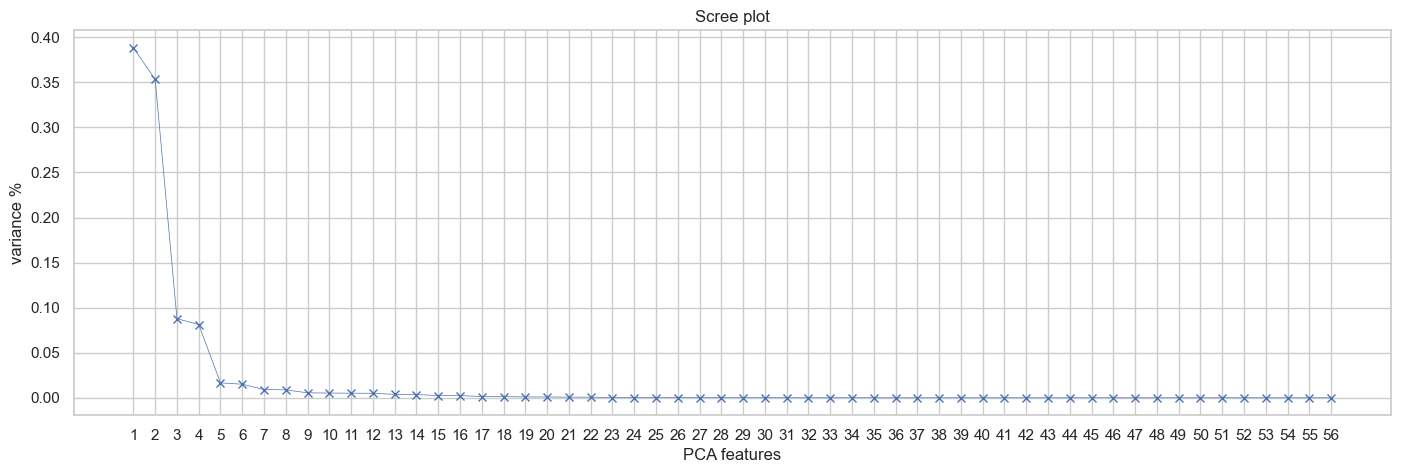

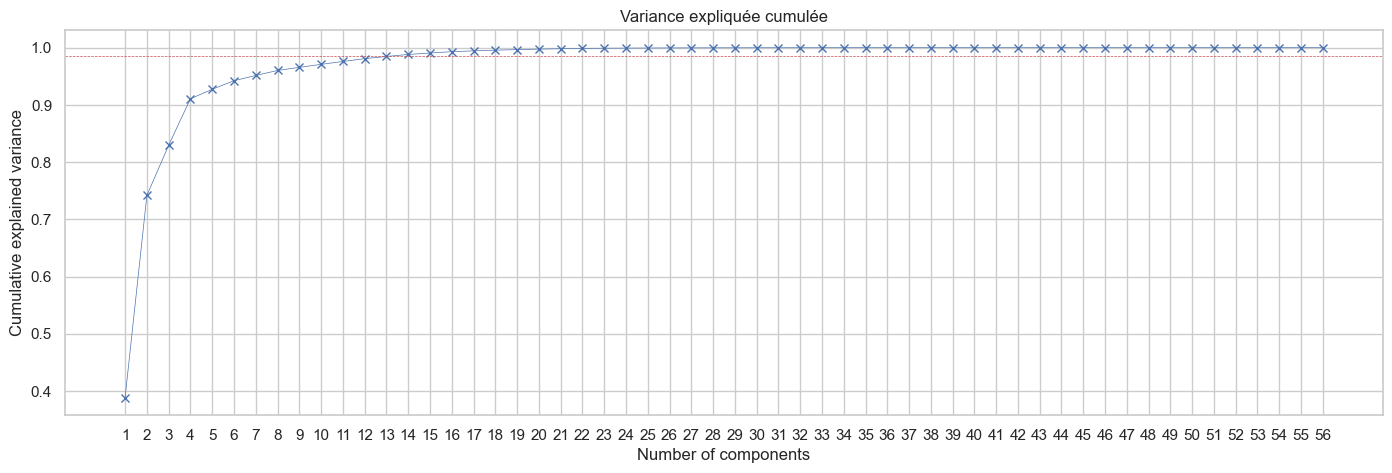

Le nombre de composantes principales retenue est : n_components = 14 pour une variance expliquée totale de 98.5%


In [135]:
# Création du modèle de PCA
pca = PCA().fit(X)

# Scree plot
features = range(1, pca.n_components_ + 1)

plt.figure(figsize = (17, 5))
plt.plot(features, pca.explained_variance_ratio_,'bx-', color = 'b', linewidth = 0.5)
plt.title('Scree plot')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

# Graphe de la variance cumulée en fonction du nombre de composantes principales.
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (17, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'bx-', linewidth = 0.5)
plt.axhline(y = goal_var, color ='r', linestyle = '--', linewidth = 0.5)
plt.title('Variance expliquée cumulée')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xticks(np.arange(1, len(cumulative_variance)+1, step=1))
plt.show()

# Sélection automatique du nombre de composantes principales.
def select_n_components(var_ratios, goal_var):
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratios:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components

n_components = select_n_components(pca.explained_variance_ratio_, goal_var)
print(f"Le nombre de composantes principales retenue est : n_components = {n_components} pour une variance expliquée totale de {goal_var * 100}%")

rq : Certains pourcentage de variance cumulées ammènent à des nombres impairs de compo. principales, est-ce cohérent sachant que l'on s'attend à avoir le même nombre de caractéristiques influencant l'issue d'un match pour les deux équipe ?

On est donc prêt à appliquer la PCA au vecteur caractéristique $X$ :

In [136]:
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X)

### Rapport de la PCA : Que venons nous de faire ? Est-ce cohérent ?

On commence avec les variances expliquées de chaque composantes :

Variance expliquée par chaque composante:
[0.38845262 0.35326738 0.08773868 0.08127998 0.01651977 0.01502115
 0.00912704 0.00875818 0.00545084 0.00521937 0.00504177 0.00495444
 0.00379206 0.00352096]
Variance cumulée expliquée:
[0.38845262 0.74172    0.82945869 0.91073867 0.92725844 0.94227959
 0.95140663 0.96016481 0.96561565 0.97083502 0.97587679 0.98083123
 0.98462329 0.98814425]


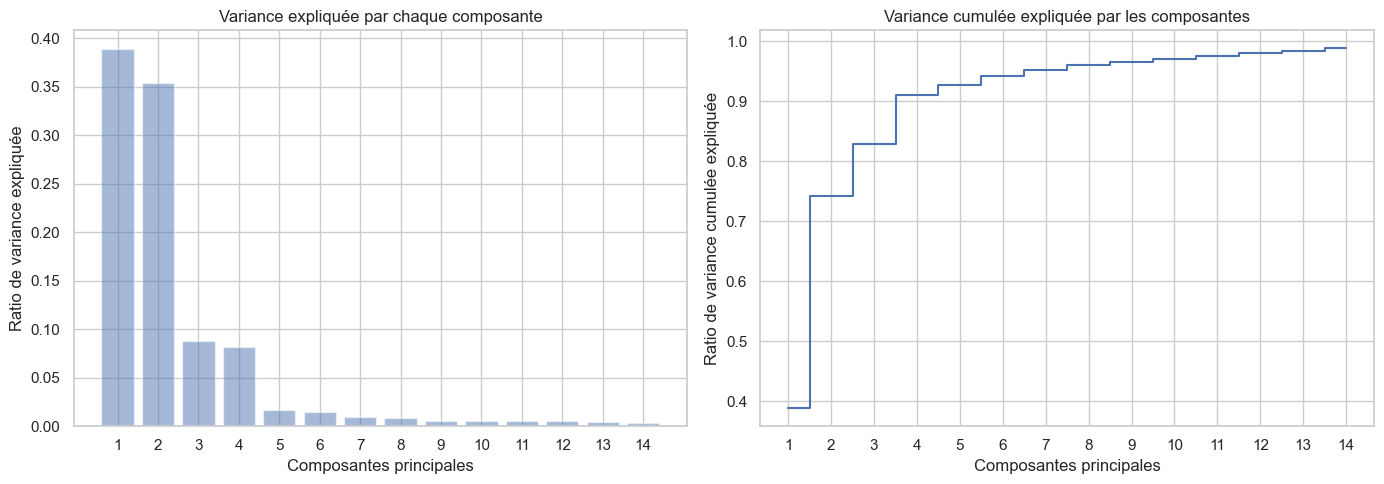

In [137]:
# Nombre de composantes et variance expliquée
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Variance expliquée par chaque composante:")
print(explained_variance)
print("Variance cumulée expliquée:")
print(cumulative_variance)

# Plotting
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha = 0.5, align = 'center', label = 'Variance individuelle expliquée')
plt.xticks(np.arange(1, len(explained_variance)+1, step=1))
plt.ylabel('Ratio de variance expliquée')
plt.xlabel('Composantes principales')
plt.title('Variance expliquée par chaque composante')

plt.subplot(1, 2, 2)
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where = 'mid',label = 'Variance cumulée expliquée')
plt.xticks(np.arange(1, len(explained_variance) + 1, step = 1))
plt.ylabel('Ratio de variance cumulée expliquée')
plt.xlabel('Composantes principales')
plt.title('Variance cumulée expliquée par les composantes')

plt.tight_layout()
plt.show()

Affichage des différentes loadings de chaque variables sur chaque composante :

In [138]:
components = pca.components_
num_components = components.shape[0]
feature_names = matches_hist_res.columns.drop(['results', 'home_club_id', 'away_club_id'])

print("Chargements pour les composantes principales:")
for i in range(num_components):
    component = components[i]
    print(f"Composante {i+1}:")
    loadings = pd.Series(component, index=feature_names)
    sorted_loadings = loadings.abs().sort_values(ascending=False)
    print(sorted_loadings.head(15))  # Afficher les 10 variables les plus importantes pour cette composante

Chargements pour les composantes principales:
Composante 1:
goal_difference                     0.179961
goal_difference_away                0.175891
goal_efficiency                     0.173981
goal_efficiency_away                0.170013
player_market_value_sum             0.167529
avg_goals_scored_per_game           0.167318
total_goals_scored_per_game         0.167318
avg_goals_scored_per_game_home      0.164330
home_goals_scored_avg               0.164330
player_market_value_sum_away        0.163745
total_goals_scored_per_game_away    0.163577
avg_goals_scored_per_game_away      0.163577
win_percentage                      0.163446
points_per_game                     0.161827
away_goals_scored_avg               0.161208
dtype: float64
Composante 2:
goal_difference_away                   0.178898
goal_difference                        0.174883
goal_efficiency_away                   0.173416
goal_efficiency                        0.169622
total_goals_scored_per_game_away       0.167

On veut alors identifier quelle variable à le plus grand impact dans l'espace de PCA, ie sur chaque composante. On définit "l'importance" d'une variable de base telle que :

$$ \text{Importance} (var_i) = \sum_{k = 0}^{n_{compo}} \text{loadings}_k(var_i)$$

Importance totale pour chaque variable:
elo_rating_away                        3.142005
elo_rating                             3.140315
draw_percentage                        2.865918
draw_percentage_away                   2.864574
player_market_value_sum_away           2.655109
player_market_value_sum                2.647011
home_goals_conceded_avg_away           2.487645
home_goals_conceded_avg                2.486549
away_goals_conceded_avg                1.958838
away_goals_conceded_avg_away           1.953268
avg_goals_conceded_per_game            1.605323
avg_goals_conceded_per_game_away       1.601068
home_losses_away                       1.571314
home_losses                            1.569868
away_losses_away                       1.505208
away_losses                            1.501888
away_goals_scored_avg                  1.351854
avg_goals_scored_per_game_away         1.351854
away_goals_scored_avg_away             1.348461
avg_goals_scored_per_game_away_away    1.348461


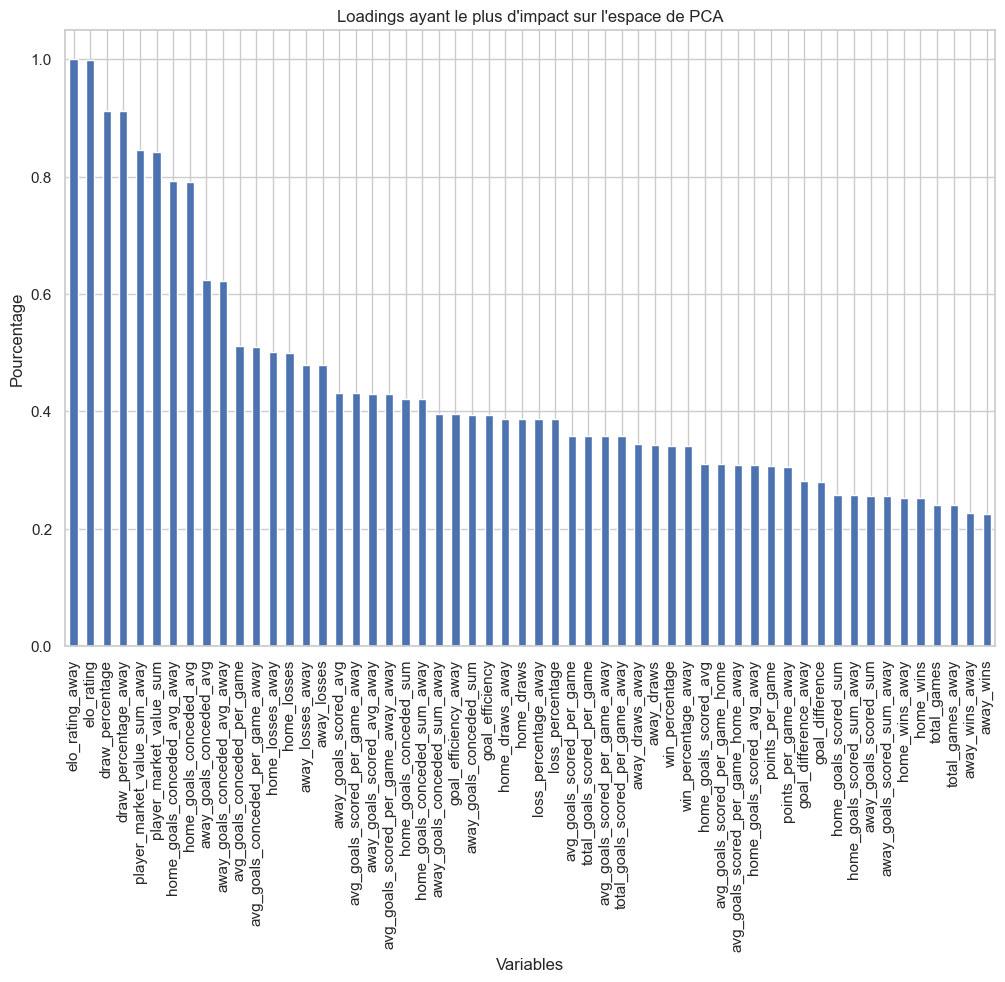

In [139]:
def calcul_total_importance(pca_components, feature_names):
    total_importance = np.sum(np.abs(pca_components), axis = 0)
    importance_series = pd.Series(total_importance, index=feature_names)
    return importance_series

# Utilisation de la fonction
components = pca.components_
feature_names = matches_hist_res.drop(['results', 'home_club_id', 'away_club_id'], axis = 1).columns # On récupère les noms des variables

# Calcul de l'importance totale
total_importance = calcul_total_importance(components, feature_names)

# Affichage des importances triées par ordre décroissant
sorted_importance = total_importance.sort_values(ascending=False)
print("Importance totale pour chaque variable:")
print(sorted_importance)

# Visualisation des données normalisées par rapport à la plus grande importance des variables.

max_importance = total_importance.max()
normalized_importance_sorted = sorted_importance / max_importance

plt.figure(figsize = ( 12, 8))
normalized_importance_sorted.plot(kind = 'bar')
plt.title("Loadings ayant le plus d'impact sur l'espace de PCA")
plt.ylabel('Pourcentage')
plt.xlabel('Variables')
plt.show()

Ce graphique montre, dans l'ordre décroissant, l'importance de chaque variable déduite par l'algorithme de réduction de dimension. L'ELO semble être la plus importante variable pour notre problème !

rq : On peut répondre à la question que l'on s'est posée précédemment, les variables semblent en effet marcher en couples. Il faudrait donc adapter son choix de la variance totale expliquée voulue pour avoir un nombre pair de composantes.

Nous avons fini l'algorithme de PCA, il est cohérent et a permit de réduire la dimensionnalité du problème, merci PCA.

### $\textrm{II.4 \space \textbf{Modèle de prédiction}}$

Notre problème est un problème de classification : Si j'ai deux clubs avec deux ensembles de statistiques différents, quel résultat dans {-1, 0, 1} vais-je obtenir.

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

On commence par diviser les  données en données d'entraînement et de test :

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 42)

### $\textrm{II.4.A \space \textbf{Support Vector Classifier (SVC)}}$

Pour entrainer le modèle de SVC optimale, on va tester plusieurs kernels et plusieurs paramètres. Heureusement, l'import suivant nous facilite la vie :

In [142]:
from sklearn.model_selection import GridSearchCV
#On utilisera l'option n_jobs = -1 pour matraquer tous les coeurs du cpu.

On créer la grille de paramètres à tester :

In [143]:
#param_grid = [
#    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
#    {'kernel': ['rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
#    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']},
#]

On effectue la recherche :

In [144]:
#grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=5, verbose=10, n_jobs=-1)
#grid_search.fit(X_train, y_train)

On affiche les résultats :

In [145]:
#print("Best Parameters:", grid_search.best_params_)
#print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

#best_model = grid_search.best_estimator_
#predictions = best_model.predict(X_test)
#print("Accuracy on Test Set:", accuracy_score(y_test, predictions))
#print("Classification Report on Test Set:")
#print(classification_report(y_test, predictions, zero_division = 0))

Problème...

Je ne comprend pas pourquoi le programme choisit des paramètres ne donnant pas la meilleure accuracy (cf en dessous) et qui ne prédisant pas les matchs nuls. On voit ensuite que le rbf avec les paramètres par défauts donne un meilleur résultat que celui donnée ci-dessus.


Choix "à la main" du modèle :

- Linear Kernel :

In [146]:
linear_model = SVC(kernel = 'linear')
linear_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
predictions_lin = linear_model.predict(X_test)
print("RBF Classification Report:")
print(classification_report(y_test, predictions_lin, zero_division = 0))
print("RBF Accuracy Score:", accuracy_score(y_test, predictions_lin))

RBF Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.43      0.44       237
           0       0.00      0.00      0.00       204
           1       0.54      0.86      0.67       375

    accuracy                           0.52       816
   macro avg       0.33      0.43      0.37       816
weighted avg       0.38      0.52      0.43       816

RBF Accuracy Score: 0.5183823529411765


- Kernel RBF (radial basis function) :

In [147]:
rbf_model = SVC(kernel = 'rbf')
rbf_model.fit(X_train, y_train)

# Prédiction et évaluation du modèle
predictions_rbf = rbf_model.predict(X_test)
print("RBF Classification Report:")
print(classification_report(y_test, predictions_rbf))
print("RBF Accuracy Score:", accuracy_score(y_test, predictions_rbf))

RBF Classification Report:
              precision    recall  f1-score   support

          -1       0.50      0.40      0.45       237
           0       0.32      0.05      0.09       204
           1       0.54      0.86      0.66       375

    accuracy                           0.52       816
   macro avg       0.46      0.44      0.40       816
weighted avg       0.48      0.52      0.46       816

RBF Accuracy Score: 0.5232843137254902


-  Kernel Polynomiale :

In [148]:
poly_model = SVC(kernel = 'poly', degree = 3)
poly_model.fit(X_train, y_train)
poly_predictions = poly_model.predict(X_test)
print("Polynomial Kernel Classification Report:")
print(classification_report(y_test, poly_predictions))
print("Polynomial Accuracy Score:", accuracy_score(y_test, poly_predictions))

Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

          -1       0.49      0.32      0.39       237
           0       0.22      0.02      0.04       204
           1       0.53      0.90      0.66       375

    accuracy                           0.51       816
   macro avg       0.41      0.42      0.36       816
weighted avg       0.44      0.51      0.43       816

Polynomial Accuracy Score: 0.5134803921568627


-  Kernel Sigmoid :

In [149]:
sigmoid_model = SVC(kernel='sigmoid')
sigmoid_model.fit(X_train, y_train)
sigmoid_predictions = sigmoid_model.predict(X_test)
print("Sigmoid Kernel Classification Report:")
print(classification_report(y_test, sigmoid_predictions))
print("Sigmoid Accuracy Score:", accuracy_score(y_test, sigmoid_predictions))

Sigmoid Kernel Classification Report:
              precision    recall  f1-score   support

          -1       0.33      0.43      0.37       237
           0       0.26      0.06      0.10       204
           1       0.52      0.65      0.58       375

    accuracy                           0.44       816
   macro avg       0.37      0.38      0.35       816
weighted avg       0.40      0.44      0.40       816

Sigmoid Accuracy Score: 0.4362745098039216


On en conclut que le modèle le plus adapté est le modèle SVC à kernel = 'rbf', C = 1, gamma = 'scale'. On pose alors le modèle best (Permet de continuer l'analyse avant la résolution de l'optimisation de paramètre)

In [150]:
best_prediction = predictions_rbf #Temporaire ?

### Rapport de la modélisation par SVC :

On va procéder à l'analyse du modèle qu'on a choisit d'utiliser, commençons par les imports :

In [151]:
from sklearn.metrics import confusion_matrix

- Matrice de Confusion

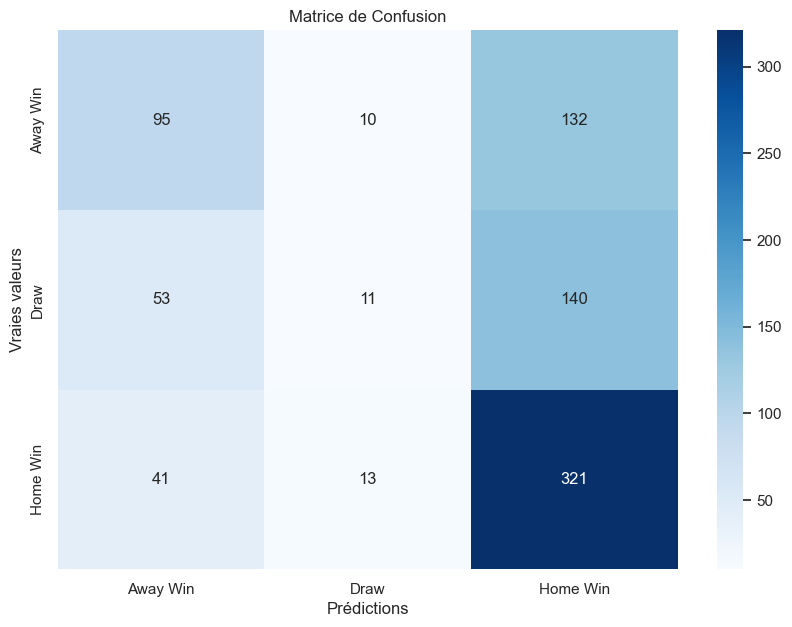

In [152]:
cm = confusion_matrix(y_test, best_prediction)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Away Win', 'Draw', 'Home Win'], yticklabels=['Away Win', 'Draw', 'Home Win'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

- Rapport de classification

In [153]:
report = classification_report(y_test, best_prediction, target_names=['Away Win', 'Draw', 'Home Win'])
print(report)

              precision    recall  f1-score   support

    Away Win       0.50      0.40      0.45       237
        Draw       0.32      0.05      0.09       204
    Home Win       0.54      0.86      0.66       375

    accuracy                           0.52       816
   macro avg       0.46      0.44      0.40       816
weighted avg       0.48      0.52      0.46       816



Le modèle à donc une précision de 53%, ce qui bat un modèle aléatoire qui aurait une précision de 33%. Notre modèle est particulièrement mauvais pour prédire les matchs nuls.

$\space$

### $\textrm{II.4.A \space \textbf{Arbre de Décision}}$


Dans cette partie, on va procéder à l'entrainement d'un modèle d'arbre de décision.

On commence par un test :

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
# Diviser les données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer un modèle d'arbre de décision
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

# Prédire les étiquettes de l'ensemble de test
predictions = classifier.predict(X_test)

# Évaluer la précision du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Générer et afficher le rapport de classification
report = classification_report(y_test, predictions, target_names = ['Away Win', 'Draw', 'Home Win'], zero_division = 0)
print(report)

Accuracy: 0.5
              precision    recall  f1-score   support

    Away Win       0.51      0.29      0.37       364
        Draw       0.00      0.00      0.00       307
    Home Win       0.50      0.92      0.64       553

    accuracy                           0.50      1224
   macro avg       0.34      0.40      0.34      1224
weighted avg       0.38      0.50      0.40      1224



Ca marche mais le modèle est loin d'être parfait. On va jouer sur les paramètre avec une GridSearch sur la profondeur.

In [156]:
param_grid = {'max_depth': range(3, 15)}
# On créé la grille de recherche.
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 5, scoring = 'accuracy')

In [157]:
# On applique la grille de recherche sur les données d'entraînement.
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)

best_classifier = grid_search.best_estimator_
predictions = best_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Générer et afficher le rapport de classification
report = classification_report(y_test, predictions, target_names = ['Away Win', 'Draw', 'Home Win'], zero_division = 0)
print(report)

Best parameters: {'max_depth': 3}
Best cross-validated score: 0.494391495375918
Accuracy: 0.5
              precision    recall  f1-score   support

    Away Win       0.51      0.29      0.37       364
        Draw       0.00      0.00      0.00       307
    Home Win       0.50      0.92      0.64       553

    accuracy                           0.50      1224
   macro avg       0.34      0.40      0.34      1224
weighted avg       0.38      0.50      0.40      1224



Le score d'accuracy est le même, le modèle d'arbre de décision ne semble pas être aussi performant...

## Conclusion

$\textbf{On choisit le modèle de prédiction par SVC avec le kernel RBF et les paramètres de base. Il a une accuracy de 0.523}$

$\space$


## $\textrm{III \space \textbf{Prédiction}}$

Rappel, on a les tableaux suivants :

In [158]:
match_pred.head()

,game_id,home_club_id,away_club_id
0,4094596,583,826
1,4094622,826,347
2,4094630,969,273
3,4094647,347,417
4,4094696,244,273


In [159]:
match_pred.columns

Index(['game_id', 'home_club_id', 'away_club_id'], dtype='object')

In [160]:
match_pred

,game_id,home_club_id,away_club_id
0,4094596,583,826
1,4094622,826,347
2,4094630,969,273
3,4094647,347,417
4,4094696,244,273
...,...,...,...
265,4094819,738,969
266,4094840,415,244
267,4094776,583,273
268,4094786,415,417


Vérifions qu'on a toutes les données nécessaires sur les matchs à prédire. Tous les clubs jouent au moins une fois à domicile, on peut donc extraire tous les club_id en faisant :

In [161]:
club_ids_stat = set(club_stat['club_id'].tolist())
club_ids_pred = set(match_pred['home_club_id'].tolist())
print(club_ids_stat, club_ids_pred)
# On passe par les sets pour retirer les duplicatas..

{1158, 1159, 1160, 1416, 1162, 1420, 1421, 1423, 273, 1041, 2969, 667, 415, 417, 162, 290, 40, 1082, 826, 3524, 583, 1095, 969, 3911, 595, 855, 347, 14171, 995, 3558, 618, 750, 244, 1147} {417, 162, 738, 3524, 1082, 1158, 583, 3911, 969, 995, 1421, 273, 1041, 244, 826, 347, 667, 415}


In [162]:
intersection = set(club_ids_stat) & set(club_ids_pred)
# assert intersection == club_ids_pred # On vérifie club_ids_pred inclut dans club_ids_stat ie qu'on a les stats de tous les clubs des matchs à prédire

On a un problème avec les clubs présent dans les matchs à prédire, il n'est pas dans club_stat('club_id') : Un club a accédé en L1 en 2023 sans y avoir été durant la période 2013 - 2022. Cherchons le(s)quel(s) :

In [163]:
print(club_ids_pred - club_ids_stat)

{738}


Le coupable est le club 738 ou "Le Havre Athletic Club". Nous allons compléter les statistiques de ce clubs avec des données synthétiques. Pour ce faire, on va attribuer la moyenne des données des clubs qui ont été relégués en L2 en 2022 : AS Saint-Étienne, FC Metz, Girondins de Bordeaux. Cela revient à supposer que les clubs relégués on à peut près le même niveau que le club promeut.

**RQ** : Suite à la construction des modèles et notament du scaler, on va travailler directement avec club_stat_normalise. 

In [164]:
club_stat_norm.dtypes

club_id                             int64
name                               object
name_abrv                          object
home_wins                         float64
home_draws                        float64
home_losses                       float64
home_goals_scored_sum             float64
home_goals_scored_avg             float64
home_goals_conceded_sum           float64
home_goals_conceded_avg           float64
away_wins                         float64
away_draws                        float64
away_losses                       float64
away_goals_scored_sum             float64
away_goals_scored_avg             float64
away_goals_conceded_sum           float64
away_goals_conceded_avg           float64
total_games                       float64
win_percentage                    float64
draw_percentage                   float64
loss_percentage                   float64
total_goals_scored_per_game       float64
avg_goals_scored_per_game         float64
avg_goals_conceded_per_game       

Obtention des statistiques synthétiques.

In [165]:
# On récupère les colonnes des clubs relégués
relegated_clubs = ['AS Saint-Étienne', 'Football Club de Metz', 'FC Girondins Bordeaux']
relegated_data = club_stat_norm[club_stat['name'].isin(relegated_clubs)]
# relegated_data

# On fais la moyennes des statistiques des clubs relégués :
relegated_stat = relegated_data.iloc[:, 3:]

club_averages = relegated_stat.mean()

In [166]:
# Identifiants
new_club = {'name' : 'Le Havre Athletic Club', 'club_id' : 738, 'name_abrv' : 'HAC'}

# Stats synthétiques que l'on convertit (on s'en fiche de comment, c'est encore mieux si les données ne sont pas exactement les moyennes des clubs peut etre?):
for col in relegated_stat.columns:
    new_club[col] = club_averages[col].astype(relegated_data[col].dtype)

#On passe au df pour ajouter à club_stat
new_club_df = pd.DataFrame([new_club])

In [167]:
club_stat_norm = pd.concat([club_stat_norm, new_club_df], ignore_index = True) # Ajout dans une cellule différente pour ne pas en avoir 40 à chaque fois qu'on lance la cellule du dessus.

In [168]:
club_stat_norm.head()

,club_id,name,name_abrv,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,...,total_goals_scored_per_game,avg_goals_scored_per_game,avg_goals_conceded_per_game,avg_goals_scored_per_game_home,avg_goals_scored_per_game_away,goal_difference,goal_efficiency,player_market_value_sum,points_per_game,elo_rating
0,40,FC Girondins Bordeaux,FCGB,0.610493,1.440329,0.949115,0.591526,0.004211,1.153315,-0.368855,...,0.113667,0.113667,-0.309007,0.004211,0.241533,-0.212574,0.019764,-0.140429,0.234407,-0.898026
1,162,Association sportive de Monaco Football Club,ASM,1.373610,0.792094,-0.144780,1.451548,1.710697,0.887731,-0.820862,...,1.843868,1.843868,-1.151918,1.710697,1.897001,1.541165,1.345588,0.861957,1.823926,1.410794
2,244,Olympique de Marseille,OM,1.475359,1.145677,0.402167,1.372647,1.033826,1.231428,-0.773976,...,1.184441,1.184441,-1.304191,1.033826,1.295636,1.242232,1.052631,1.065992,1.514881,1.316994
3,273,Stade Rennais Football Club,SRFC,1.144675,1.027816,1.313747,1.064933,0.473071,1.200183,-0.819153,...,0.568026,0.568026,-1.000678,0.473071,0.648226,0.551365,0.534314,0.252943,0.665169,1.013813
4,290,AJ Auxerre,AJA,-1.220987,-1.447262,-1.724851,-1.254760,-1.234169,-1.705619,1.137730,...,-0.938671,-0.938671,1.196097,-1.234169,-0.535405,-0.186003,-0.801886,-0.579553,-1.005506,-0.537054


On a réussit à créer des données synthétiques pour un club n'ayant jamais joué en Ligue 1 durant la période 2013 - 2022.

### Création du fichier de prédiction

Rappel de ce que notre modèle prend en entrée :

In [169]:
pca.feature_names_in_

array(['home_wins', 'home_draws', 'home_losses', 'home_goals_scored_sum',
       'home_goals_scored_avg', 'home_goals_conceded_sum',
       'home_goals_conceded_avg', 'away_wins', 'away_draws',
       'away_losses', 'away_goals_scored_sum', 'away_goals_scored_avg',
       'away_goals_conceded_sum', 'away_goals_conceded_avg',
       'total_games', 'win_percentage', 'draw_percentage',
       'loss_percentage', 'total_goals_scored_per_game',
       'avg_goals_scored_per_game', 'avg_goals_conceded_per_game',
       'avg_goals_scored_per_game_home', 'avg_goals_scored_per_game_away',
       'goal_difference', 'goal_efficiency', 'player_market_value_sum',
       'points_per_game', 'elo_rating', 'home_wins_away',
       'home_draws_away', 'home_losses_away',
       'home_goals_scored_sum_away', 'home_goals_scored_avg_away',
       'home_goals_conceded_sum_away', 'home_goals_conceded_avg_away',
       'away_wins_away', 'away_draws_away', 'away_losses_away',
       'away_goals_scored_sum_away', 

On écrit une fonction qui extrait les stats des clubs qui s'opposent :

In [170]:
def feature_extraction_norm(home_club_id, away_club_id):
    # On extrait les stats de club_stat qui sont indéxés par les club_id.
    home_stats = club_stat_norm[club_stat_norm['club_id'] == home_club_id]
    away_stats = club_stat_norm[club_stat_norm['club_id'] == away_club_id]
    
    #On supprime les colonnes qui ne servent à rien.
    home_stats = home_stats.drop(columns=['club_id', 'name', 'name_abrv'])
    away_stats = away_stats.drop(columns=['club_id', 'name', 'name_abrv'])
    #print(home_stats) J'ai passé 2 heure à débug cet endroit pour me rendre compte que je n'avais pas mis à jour le bon dataframe avec les infos du club manquant :)
    # On ajoute le préfixe _away au club away. (Je ne sais pas si c'est nécessaire mais ca permet de rester cohérent avec les données d'entraînement)
    away_stats.columns = [f'{col}_away' for col in away_stats.columns]

    # On reset les index pour la concaténation
    home_stats.reset_index(drop = True, inplace = True)
    away_stats.reset_index(drop = True, inplace = True)

    # Concaténation
    features = pd.concat([home_stats, away_stats], axis=1)
    return features

In [171]:
# Test de la prédiction. On récupère les données des deux clubs, on les agrège puis on les normalises 
features_normed = feature_extraction_norm(969, 738)
features_normed

,home_wins,home_draws,home_losses,home_goals_scored_sum,home_goals_scored_avg,home_goals_conceded_sum,home_goals_conceded_avg,away_wins,away_draws,away_losses,...,total_goals_scored_per_game_away,avg_goals_scored_per_game_away,avg_goals_conceded_per_game_away,avg_goals_scored_per_game_home_away,avg_goals_scored_per_game_away_away,goal_difference_away,goal_efficiency_away,player_market_value_sum_away,points_per_game_away,elo_rating_away
0,0.890303,1.204607,1.739151,1.017592,0.3868,1.575125,-0.277027,0.56163,1.517037,1.576027,...,-0.160891,-0.160891,-0.032621,-0.057506,-0.271298,-0.334362,-0.135421,-0.129811,0.010138,-0.892816


In [172]:
features_pca = pca.transform(features_normed)
predicted_result = rbf_model.predict(features_pca)
predicted_result

array([1], dtype=int64)

Ca marche !

Le code est prêt, il suffit juste de l'appliquer à toutes les oppositions :

In [173]:
Prediction_final = []

for index, row in match_pred.iterrows():
    features_normed = feature_extraction_norm(row['home_club_id'], row['away_club_id'])
    features_pca = pca.transform(features_normed)  # Apply PCA
    prediction = rbf_model.predict(features_pca)  # Predict the result
    Prediction_final.append((row['game_id'], prediction[0]))  # Append game_id and result

# Convert the results into a DataFrame
final_predictions_df = pd.DataFrame(Prediction_final, columns=['game_id', 'results'])


In [174]:
final_predictions_df.head()

,game_id,results
0,4094596,1
1,4094622,1
2,4094630,1
3,4094647,-1
4,4094696,1


Emballer c'est pesé.

Exportation au format demandé :

In [175]:
final_predictions_df.to_csv("prediction.csv", index = False) # ie sans index par défault et avec les colonnes : "game_id" et "results"

### Analyse de la prédiction :

On commence par agréger les données pour faire des visualisations :

In [176]:
res_df = pd.merge(match_pred, final_predictions_df)

res_df = pd.merge(
    res_df,
    club_stat_norm[['club_id', 'name', 'name_abrv']],
    left_on='home_club_id',
    right_on='club_id',
    how='left'
)

res_df.rename(columns={
    'name': 'name_home',
    'name_abrv': 'name_abrv_home',
    'club_id': 'club_id_home'
}, inplace=True)

res_df = pd.merge(
    res_df,
    club_stat_norm[['club_id', 'name', 'name_abrv']],
    left_on='away_club_id',
    right_on='club_id',
    how='left'
)

res_df.rename(columns={
    'name': 'name_away',
    'name_abrv': 'name_abrv_away',
    'club_id': 'club_id_away'
}, inplace=True)

res_df.drop(columns=['club_id_home', 'club_id_away'], inplace=True)
res_df

,game_id,home_club_id,away_club_id,results,name_home,name_abrv_home,name_away,name_abrv_away
0,4094596,583,826,1,Paris Saint-Germain Football Club,PSG,Racing Club de Lens,RCL
1,4094622,826,347,1,Racing Club de Lens,RCL,Football Club de Metz,FCM
2,4094630,969,273,1,Montpellier Hérault Sport Club,MHSC,Stade Rennais Football Club,SRFC
3,4094647,347,417,-1,Football Club de Metz,FCM,Olympique Gymnaste Club Nice Côte d'Azur,OGCN
4,4094696,244,273,1,Olympique de Marseille,OM,Stade Rennais Football Club,SRFC
...,...,...,...,...,...,...,...,...
265,4094819,738,969,1,Le Havre Athletic Club,HAC,Montpellier Hérault Sport Club,MHSC
266,4094840,415,244,-1,Toulouse Football Club,TFC,Olympique de Marseille,OM
267,4094776,583,273,1,Paris Saint-Germain Football Club,PSG,Stade Rennais Football Club,SRFC
268,4094786,415,417,-1,Toulouse Football Club,TFC,Olympique Gymnaste Club Nice Côte d'Azur,OGCN


On propose alors de présenter les résultats prédit de la saison :

In [177]:
# Calcul des points : 3 pour victoire, 1 pour nul et 0 pour défaite, on doit faire attention au fait que les équipes sont home et away...
res_df['home_points'] = res_df['results'].apply(lambda x: 3 if x == 1 else (0 if x == -1 else 1))
res_df['away_points'] = res_df['results'].apply(lambda x: 3 if x == -1 else (0 if x == 1 else 1))

home_points = res_df.groupby('name_home')['home_points'].sum().reset_index()
home_points.rename(columns={'name_home': 'club', 'home_points': 'points'}, inplace=True)
away_points = res_df.groupby('name_away')['away_points'].sum().reset_index()
away_points.rename(columns={'name_away': 'club', 'away_points': 'points'}, inplace=True)

# On concatène
total_points = pd.concat([home_points, away_points]).groupby('club')['points'].sum().reset_index()

# On sort Descending et on ajoute le ranking
total_points.sort_values(by = 'points', ascending = False, inplace = True)
total_points['rank'] = range(1, len(total_points) + 1)
total_points = total_points[['rank', 'club', 'points']]

print(total_points)

    rank                                           club  points
11     1              Paris Saint-Germain Football Club      90
0      2   Association sportive de Monaco Football Club      75
9      3                             Olympique Lyonnais      75
10     4                         Olympique de Marseille      69
6      5  Lille Olympique Sporting Club Lille Métropole      60
8      6       Olympique Gymnaste Club Nice Côte d'Azur      60
14     7                    Stade Rennais Football Club      48
7      8                 Montpellier Hérault Sport Club      43
4      9                        Football Club de Nantes      40
16    10                                 Stade de Reims      37
12    11                            Racing Club de Lens      36
5     12                         Le Havre Athletic Club      34
13    13               Racing Club de Strasbourg Alsace      31
17    14                         Toulouse Football Club      25
2     15             Football Club Lorie

$\space$

## $\textrm{\textbf{Conclusion}}$


En résumé, nous avons proposé une prédiction des résultats de match de Ligue 1 en utilisant des données historiques. Au vu de la précision de notre algorithme, celui-ci n'est pas en mesure de fournir des prédictions utilisables dans la vraie vie en l'état actuel. Cependant, nous pouvons proposer des pistes d'améliorations qui peuvent être poursuivies et qui pourraient drastiquement améliorer la précision de ce modèle :

Sur les données :

- Acquisition d'une plus grande quantité de données sur les équipes : les équipes de football d'Europe forment un "système quasi-isolé", plus on récupère de données sur les équipes en Europe et leurs rencontres, plus on aura d'informations sur les compétitions, même locales comme la Ligue 1.
- Création de métriques plus sophistiquées : extraire encore plus de quantité d'information d'un même ensemble de statistiques.

Sur le modèle :

- Jouer davantage sur la paramétrisation des modèles déjà employés (surtout l'arbre de décision que nous avons traité très rapidement).
- Trouver d'autres modèles qui résolvent des problèmes de classification comme les réseaux de neuronnes avec Tensorflow... 

L'évolution la plus importante pourrait sûrement être faite en modifiant la temporalité du modèle : plutôt que de prédire les matchs sur une saison entière, on pourrait prédire les matchs de journée en journée, voire même de match en match.

Bien sûr, toutes ces améliorations ont aussi des inconvénients, l'un des plus évidents étant que la complexité des algorithmes va exploser (littéralement et figurativement).

$\space$

## $\textrm{\textbf{Sources}}$

Nous avons utilisé les sources suivantes pour l'ensemble de ce projet,

Pour les matchs hors championnat:

-https://www.lequipe.fr/Football/coupe-de-france/saison-2022-2023/page-calendrier-resultats/16es-de-finale

-https://www.worldfootball.net/teams/paris-saint-germain/2023/3/

Concernant l'elo rating:

-https://en.wikipedia.org/wiki/Elo_rating_system

Enfin concernant l'utilisation d'un système reprenant les bases d'un portefeuille de MArkovitz (thème vu en A3, en Introduction aux marchés financiers):

-https://fr.wikipedia.org/wiki/Th%C3%A9orie_moderne_du_portefeuille





<div align = "center">
<h1 style="font-size:100px;">~</h1>
</div>

## Remerciements

Nous tenions à vous remercier pour ce projet qui nous a permis d'apprendre à manipuler des données réelles et à comprendre les modèles de prédiction. Nous sommes également reconnaissants pour l'attention que vous avez portée à son évaluation.

Nous envisageons de poursuivre ce projet sur notre temps libre afin de l'améliorer et, pourquoi pas, de lui trouver des applications concrètes. Si vous avez la possibilité, nous vous serions reconnaissants de nous faire part de vos commentaires, conseils ou critiques à ces adresses :

Robin SIODLAK : robin.siodlak@edu.devinci.fr

Nicolas BIGEARD : nicolas.bigeard@edu.devinci.fr
